<a href="https://colab.research.google.com/github/sooyen12/Time-series/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 데이터 불러오기
df_household = pd.read_excel("/content/drive/MyDrive/학교 수업/2025년 1학기 /2025 1학기 - 시계열데이터분석/시계열 프로젝트/1인가구_성별_나이_지역(2015~2022).xlsx")
df_criminals = pd.read_excel("/content/drive/MyDrive/학교 수업/2025년 1학기 /2025 1학기 - 시계열데이터분석/시계열 프로젝트/범죄자_범행시_성별_연령(2015~2022).xlsx")

# 전처리 - 1인가구

In [ ]:
df_household_entire = df_household.iloc[1:48]
df_household_entire

,행정구역별(시군구),성별,연령,2015,2016,2017,2018,2019,2020,2021,2022
1,전국,계,합계,5203440,5397615,5618677,5848594,6147516,6643354,7165788,7502350
2,전국,계,20세 미만,58020,62639,61058,58154,59415,76202,54052,53088
3,전국,계,20~24,367152,391628,393503,402476,431750,492331,492845,485508
4,전국,계,25~29,519871,537780,568288,617468,685831,774580,870707,901044
5,전국,계,30~34,533193,519528,516827,522405,554883,618401,704883,774710
6,전국,계,35~39,420129,429109,451634,470332,480733,497117,521151,524136
7,전국,계,40~44,428605,408807,407777,400122,401653,427295,467949,494473
8,전국,계,45~49,421153,434237,455033,464099,470000,476521,482287,483104
9,전국,계,50~54,430941,430168,435035,450375,470795,497959,541978,568098
10,전국,계,55~59,446608,481691,512691,524069,528252,541536,558936,569407


In [ ]:
# 1인 가구 데이터 전처리
df_household = df_household.drop(0, axis=0)
keywords_to_remove = ['전국', '계', '합계']

rows_to_remove_mask = df_household.apply(
    lambda row: any(row.astype(str).str.contains('|'.join(keywords_to_remove), na=False)),
    axis=1
)
df_household = df_household[~rows_to_remove_mask]
mapping = {
    '20세 미만': '20세 이하',
    '20~24': '21~30세',
    '25~29': '21~30세',
    '30~34': '31~40세',
    '35~39': '31~40세',
    '40~44': '41~50세',
    '45~49': '41~50세',
    '50~54': '51~60세',
    '55~59': '51~60세',
    '60~64': '61~70세',
    '65~69': '61~70세',
    '70~74': '71세 이상',
    '75~79': '71세 이상',
    '80~84': '71세 이상',
    '85세 이상': '71세 이상'
}

df_household['연령_new'] = df_household['연령'].map(mapping)
print(df_household[['연령', '연령_new']])
df_household = df_household.drop('연령', axis=1)
df_household = df_household.rename(columns={'연령_new': '연령'})

df_household_melted = df_household.melt(
    id_vars=['행정구역별(시군구)', '성별', '연령'],
    var_name='연도',
    value_name='1인가구수'
)

df_household_melted['연도'] = pd.to_numeric(df_household_melted['연도'], errors='coerce')
df_household_melted['1인가구수'] = pd.to_numeric(df_household_melted['1인가구수'], errors='coerce')
df_household_melted['1인가구수'] = df_household_melted['1인가구수'].fillna(0)
df_household = df_household_melted
df_household_melted

         연령  연령_new
66   20세 미만  20세 이하
67    20~24  21~30세
68    25~29  21~30세
69    30~34  31~40세
70    35~39  31~40세
..      ...     ...
860   65~69  61~70세
861   70~74  71세 이상
862   75~79  71세 이상
863   80~84  71세 이상
864  85세 이상  71세 이상

[510 rows x 2 columns]


<ipython-input-16-0a2dabb2b458>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_household['연령_new'] = df_household['연령'].map(mapping)


,행정구역별(시군구),성별,연령,연도,1인가구수
0,서울특별시,남자,20세 이하,2015,5604
1,서울특별시,남자,21~30세,2015,37155
2,서울특별시,남자,21~30세,2015,84013
3,서울특별시,남자,31~40세,2015,89993
4,서울특별시,남자,31~40세,2015,60969
...,...,...,...,...,...
4075,제주특별자치도,여자,61~70세,2022,3916
4076,제주특별자치도,여자,71세 이상,2022,3012
4077,제주특별자치도,여자,71세 이상,2022,2739
4078,제주특별자치도,여자,71세 이상,2022,2663


# 전처리 - 범죄

In [ ]:
df_criminals = df_criminals.drop('죄종별(1)', axis=1)
df_criminals = df_criminals.rename(columns={
    '죄종별(2)': '죄종별',
    '성별(1)': '성별',
    '연령별(1)': '연령'
})
df_criminals_entire = df_criminals.iloc[0:19]
df_criminals_entire

,죄종별,성별,연령,2015,2016,2017,2018,2019,2020,2021,2022
0,소계,계,계,1771390,1847605,1685461,1581922,1585638,1494421,1247680,1250330
1,소계,남자,계,1437943,1500515,1357873,1257998,1245049,1174763,974530,977984
2,소계,남자,20세이하,102265,98933,91650,83507,84908,84696,68997,72468
3,소계,남자,21-30세,230062,243829,225940,205601,203765,193314,166680,176314
4,소계,남자,31-40세,292020,306900,264319,231691,220024,199230,162011,165501
5,소계,남자,41-50세,360791,365226,316385,283902,269082,243182,195464,194843
6,소계,남자,51-60세,313031,327758,300388,285879,283160,268053,214493,204714
7,소계,남자,61-70세,104834,119071,120967,125642,137301,138621,122953,121621
8,소계,남자,71세이상,33871,37621,37463,40348,45690,46441,42779,41126
9,소계,남자,미상,1069,1177,761,1428,1119,1226,1153,1397


In [ ]:
# 범죄 데이터 전처리
keywords_to_remove_criminals = ['소계', '계']

rows_to_remove_mask_criminals = df_criminals.apply(
    lambda row: any(row.astype(str).str.contains('|'.join(keywords_to_remove_criminals), na=False)),
    axis=1
)

df_criminals = df_criminals[~rows_to_remove_mask_criminals]

df_criminals_melted = df_criminals.melt(
    id_vars=['죄종별', '성별', '연령'],
    value_vars=['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
    var_name='연도',
    value_name='범죄자수'
)
df_criminals_melted['연도'] = df_criminals_melted['연도'].astype(int)
df_criminals_melted['범죄자수'] = pd.to_numeric(df_criminals_melted['범죄자수'], errors='coerce')
df_criminals_melted['범죄자수'] = df_criminals_melted['범죄자수'].fillna(0)
df_criminals_melted['범죄자수'] = df_criminals_melted['범죄자수'].astype(int)
df_criminals_melted

,죄종별,성별,연령,연도,범죄자수
0,살인기수,남자,20세이하,2015,6
1,살인기수,남자,21-30세,2015,41
2,살인기수,남자,31-40세,2015,54
3,살인기수,남자,41-50세,2015,85
4,살인기수,남자,51-60세,2015,72
...,...,...,...,...,...
4859,기타범죄,여자,41-50세,2022,14482
4860,기타범죄,여자,51-60세,2022,14522
4861,기타범죄,여자,61-70세,2022,7863
4862,기타범죄,여자,71세이상,2022,2080


# 간단한 시각화 - 1인 가구

In [ ]:
!pip install koreanize-matplotlib

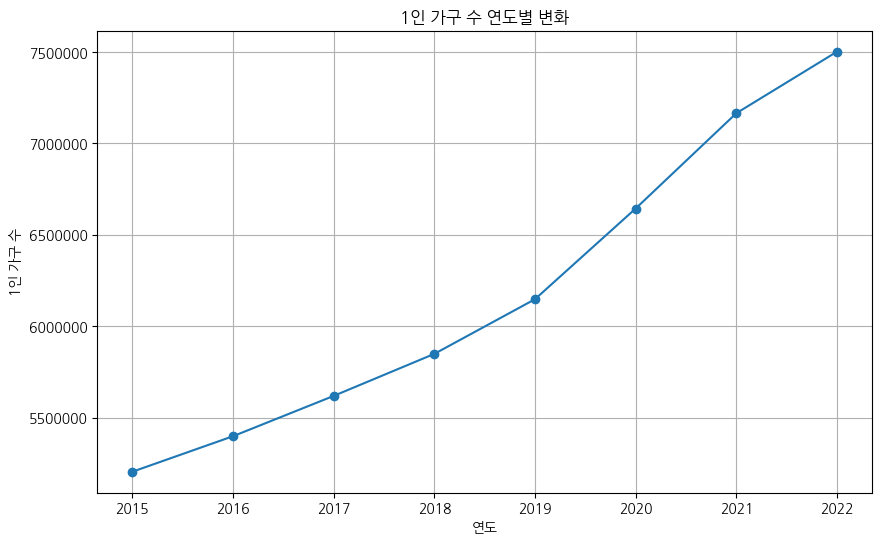

In [ ]:
# 1인 가구 수 변화
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

first_row_data = df_household_entire.iloc[0]
year_columns = [col for col in df_household_entire.columns if str(col).isdigit()]

household_counts = first_row_data[year_columns]

ts_first_row = pd.Series(household_counts.values, index=pd.to_datetime(year_columns, format='%Y'))
plt.figure(figsize=(10, 6))
plt.plot(ts_first_row.index, ts_first_row.values, marker='o', linestyle='-')
try:
    location = first_row_data['행정구역별(시군구)'] if '행정구역별(시군구)' in first_row_data else 'Unknown Location'
    gender = first_row_data['성별'] if '성별' in first_row_data else 'Unknown Gender'
    age = first_row_data['연령'] if '연령' in first_row_data else 'Unknown Age'
    plt.title('1인 가구 수 연도별 변화')
except KeyError:
     plt.title('선택된 행의 1인 가구 수 연도별 변화')


plt.xlabel('연도')
plt.ylabel('1인 가구 수')
plt.grid(True)

# Y축 눈금 서식을 일반 숫자로 변경
plt.ticklabel_format(axis='y', style='plain')

plt.show()


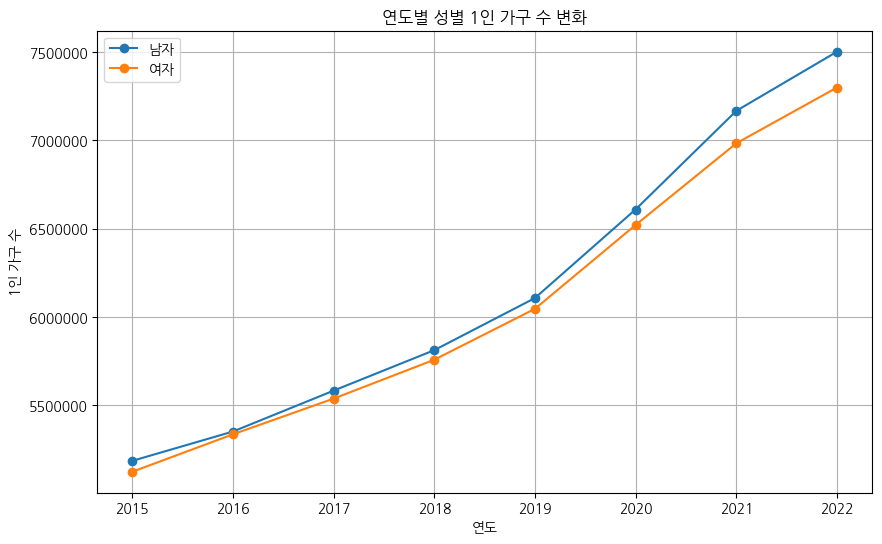

In [ ]:
# 연도별 성별 1인 가구수 변화
import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib

df_male = df_household_entire[df_household_entire['성별'] == '남자'].copy()
df_female = df_household_entire[df_household_entire['성별'] == '여자'].copy()
year_columns = [col for col in df_household_entire.columns if str(col).isdigit()]
df_male[year_columns] = df_male[year_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
df_female[year_columns] = df_female[year_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

total_male_households_by_year = df_male[year_columns].sum()
total_female_households_by_year = df_female[year_columns].sum()

ts_male = pd.Series(total_male_households_by_year.values, index=pd.to_datetime(year_columns, format='%Y'))
ts_female = pd.Series(total_female_households_by_year.values, index=pd.to_datetime(year_columns, format='%Y'))

plt.figure(figsize=(10, 6))

plt.plot(ts_male.index, ts_male.values, marker='o', linestyle='-', label='남자')
plt.plot(ts_female.index, ts_female.values, marker='o', linestyle='-', label='여자')

plt.title('연도별 성별 1인 가구 수 변화')
plt.xlabel('연도')
plt.ylabel('1인 가구 수')
plt.grid(True)
plt.legend()
plt.ticklabel_format(axis='y', style='plain')
plt.show()

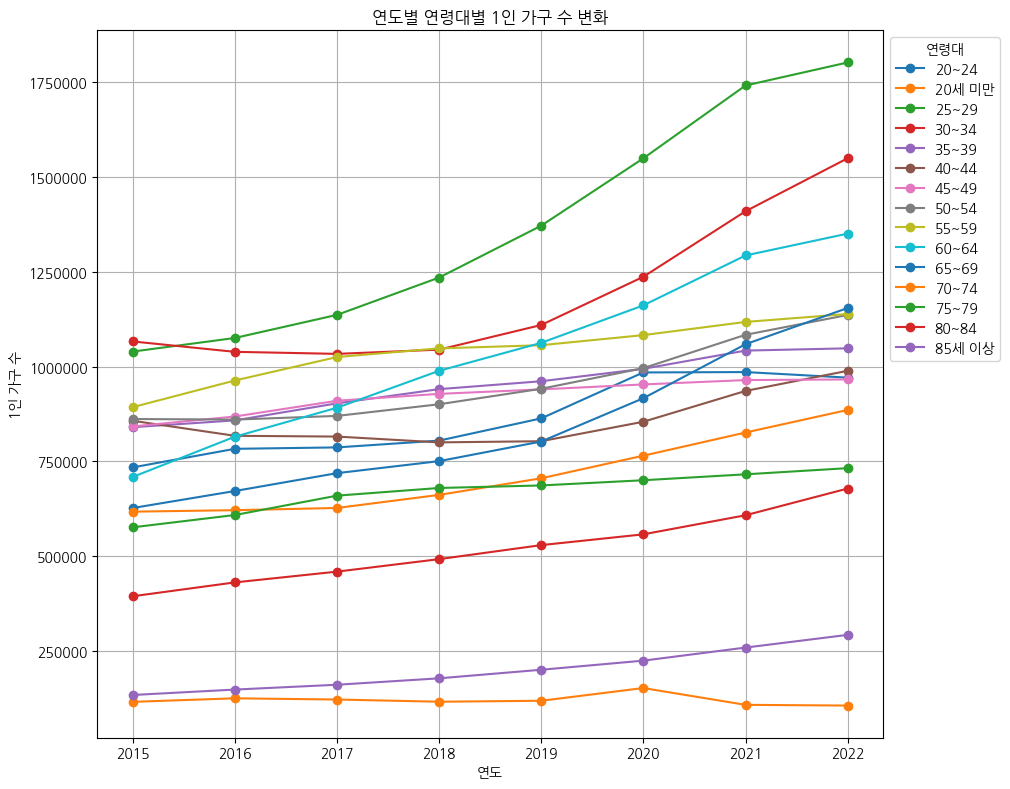

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

if 'df_household_entire' in globals() and not df_household_entire.empty:
    df_household_filtered = df_household_entire[
        ~df_household_entire['연령'].astype(str).str.contains('합계', na=False)
    ].copy()
    year_columns = [col for col in df_household_filtered.columns if str(col).isdigit()]
    for col in year_columns:
        df_household_filtered[col] = pd.to_numeric(df_household_filtered[col], errors='coerce')
    grouped_by_age = df_household_filtered.groupby('연령')[year_columns].sum()
    plt.figure(figsize=(12, 8))
    sorted_age_groups = grouped_by_age.index

    for age_group in sorted_age_groups:
        if age_group in grouped_by_age.index:
            row = grouped_by_age.loc[age_group]
            ts_age_group = pd.Series(row.values, index=pd.to_datetime(year_columns, format='%Y'))
            plt.plot(ts_age_group.index, ts_age_group.values, marker='o', linestyle='-', label=age_group)


    plt.title('연도별 연령대별 1인 가구 수 변화')
    plt.xlabel('연도')
    plt.ylabel('1인 가구 수')
    plt.grid(True)
    plt.legend(title='연령대', loc='upper left', bbox_to_anchor=(1, 1))
    plt.ticklabel_format(axis='y', style='plain')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

else:
    print("Error: df_household_entire 데이터를 찾을 수 없거나 비어 있습니다.")

# 간단한 시각화 - 범죄자

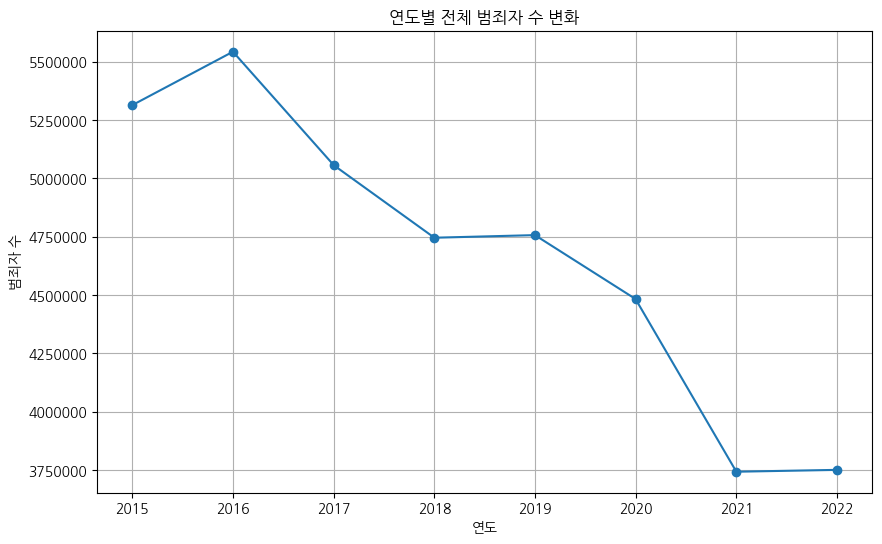

In [ ]:
# 전체
import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
if 'df_criminals_entire' in globals() and not df_criminals_entire.empty:
    year_columns = [col for col in df_criminals_entire.columns if str(col).isdigit()]
    total_criminals_by_year = df_criminals_entire[year_columns].sum()
    ts_criminals = pd.Series(total_criminals_by_year.values, index=pd.to_datetime(year_columns, format='%Y'))
    plt.figure(figsize=(10, 6))
    plt.plot(ts_criminals.index, ts_criminals.values, marker='o', linestyle='-')
    plt.title('연도별 전체 범죄자 수 변화')
    plt.xlabel('연도')
    plt.ylabel('범죄자 수')
    plt.grid(True)
    plt.ticklabel_format(axis='y', style='plain')
    plt.show()
else:
    print("Error: df_criminals_entire 데이터를 찾을 수 없거나 비어 있습니다.")

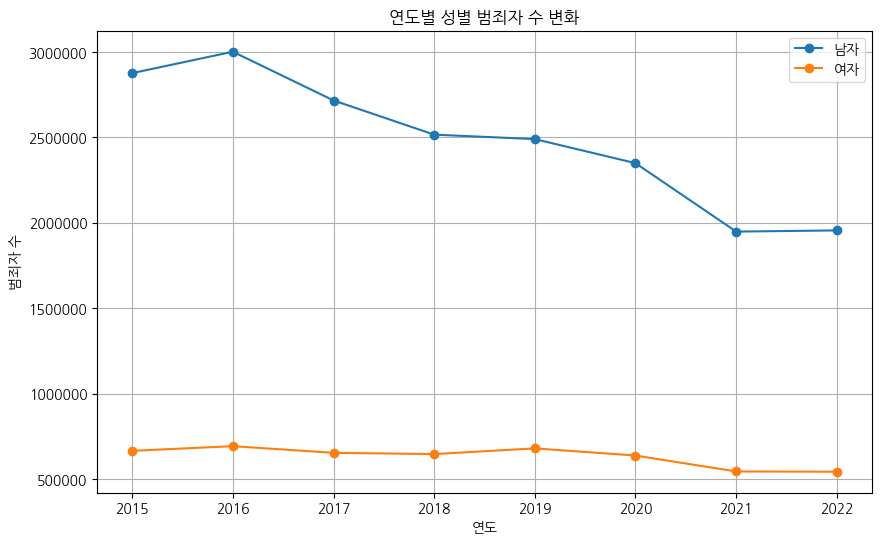

In [ ]:
# 성별
import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

if 'df_criminals_entire' in globals() and not df_criminals_entire.empty:
    year_columns = [col for col in df_criminals_entire.columns if str(col).isdigit()]
    df_male = df_criminals_entire[df_criminals_entire['성별'] == '남자'].copy()
    df_female = df_criminals_entire[df_criminals_entire['성별'] == '여자'].copy()
    df_male[year_columns] = df_male[year_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
    df_female[year_columns] = df_female[year_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
    total_male_criminals_by_year = df_male[year_columns].sum()
    total_female_criminals_by_year = df_female[year_columns].sum()
    ts_male = pd.Series(total_male_criminals_by_year.values, index=pd.to_datetime(year_columns, format='%Y'))
    ts_female = pd.Series(total_female_criminals_by_year.values, index=pd.to_datetime(year_columns, format='%Y'))
    plt.figure(figsize=(10, 6))
    plt.plot(ts_male.index, ts_male.values, marker='o', linestyle='-', label='남자')
    plt.plot(ts_female.index, ts_female.values, marker='o', linestyle='-', label='여자')
    plt.title('연도별 성별 범죄자 수 변화')
    plt.xlabel('연도')
    plt.ylabel('범죄자 수')
    plt.grid(True)
    plt.legend()
    plt.ticklabel_format(axis='y', style='plain')
    plt.show()
else:
    print("Error: df_criminals_entire 데이터를 찾을 수 없거나 비어 있습니다.")

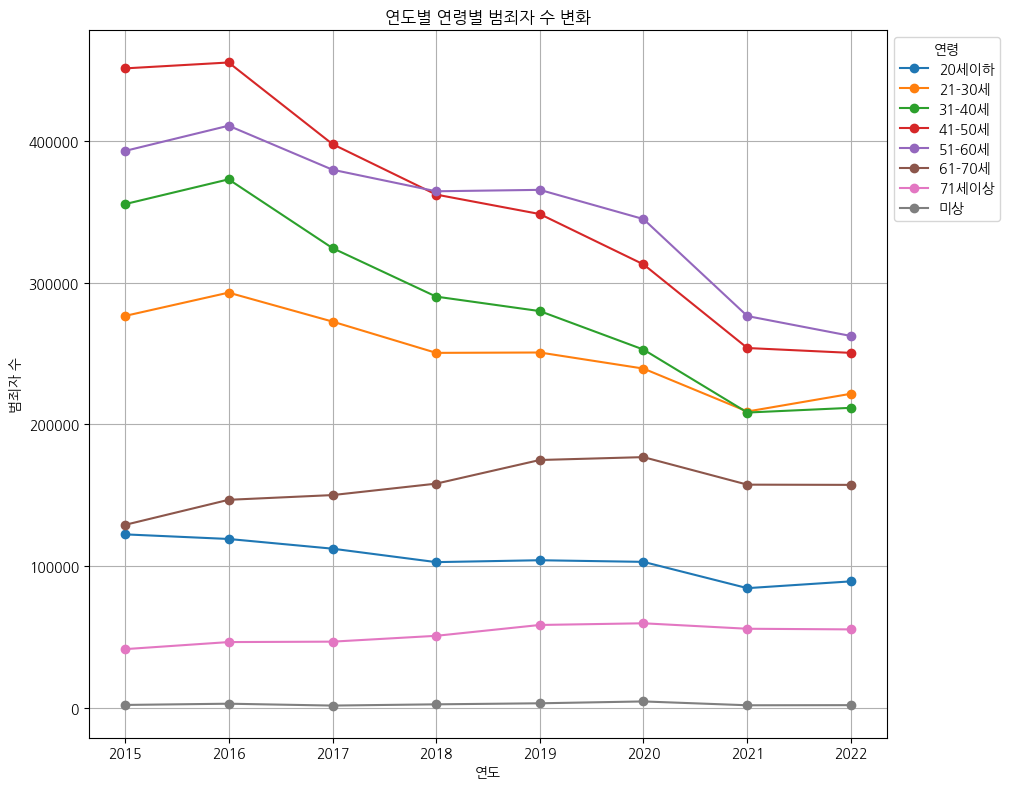

In [ ]:
# 연령별
import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

if 'df_criminals_entire' in globals() and not df_criminals_entire.empty:
    year_columns = [col for col in df_criminals_entire.columns if str(col).isdigit()]
    df_criminals_filtered = df_criminals_entire[
        ~df_criminals_entire['연령'].astype(str).str.contains('소계|계', na=False)
    ].copy()
    for col in year_columns:
        df_criminals_filtered[col] = pd.to_numeric(df_criminals_filtered[col], errors='coerce').fillna(0)
    grouped_by_age = df_criminals_filtered.groupby('연령')[year_columns].sum()
    plt.figure(figsize=(12, 8))
    for age_group in grouped_by_age.index:
        if age_group in grouped_by_age.index:
            row = grouped_by_age.loc[age_group]
            ts_age_group = pd.Series(row.values, index=pd.to_datetime(year_columns, format='%Y'))
            plt.plot(ts_age_group.index, ts_age_group.values, marker='o', linestyle='-', label=age_group)
    plt.title('연도별 연령별 범죄자 수 변화')
    plt.xlabel('연도')
    plt.ylabel('범죄자 수')
    plt.grid(True)
    plt.legend(title='연령', loc='upper left', bbox_to_anchor=(1, 1))
    plt.ticklabel_format(axis='y', style='plain')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()
else:
    print("Error: df_criminals_entire 데이터를 찾을 수 없거나 비어 있습니다.")

# 증가율 계산 - 1인 가구수

In [ ]:
# 전체 1인 가구수 증가율
first_row_data = df_household_entire.iloc[0]
year_columns = [col for col in df_household_entire.columns if str(col).isdigit()]
household_counts = first_row_data[year_columns]
household_counts = pd.to_numeric(household_counts, errors='coerce')
growth_rate = household_counts.pct_change() * 100
growth_rate

,1
2015,NaN
2016,3.731666
2017,4.095550
2018,4.092013
2019,5.111006
2020,8.065664
2021,7.864010
2022,4.696790


In [ ]:
import pandas as pd

df_household_melted['연도'] = df_household_melted['연도'].astype(int)
df_household_melted = df_household_melted.sort_values(by=['행정구역별(시군구)', '성별', '연령', '연도'])

def calculate_growth_rate(data):
    return data.pct_change() * 100

df_household_melted['증가율_지역_성별_연령'] = df_household_melted.groupby(['행정구역별(시군구)', '성별', '연령'])['1인가구수'].transform(calculate_growth_rate)
df_household_melted['증가율_성별_연령'] = df_household_melted.groupby(['성별', '연령'])['1인가구수'].transform(calculate_growth_rate)

df_growth_rate = df_household_melted.copy()

average_growth_by_gender = df_growth_rate.groupby('성별')['증가율_성별_연령'].mean().reset_index()
average_growth_by_gender.columns = ['성별', '평균 증가율 (%)'] # 컬럼명 변경
average_growth_by_gender

,성별,평균 증가율 (%)
0,남자,22.662784
1,여자,9.426318


In [ ]:
# 연령별 순서대로 정렬하기 위한 리스트 정의
age_order_new = ['20세 이하', '21~30세', '31~40세', '41~50세','51~60세','61~70세', '71세 이상']

# '연령' 컬럼의 순서를 명시적으로 지정
df_growth_rate['연령'] = pd.Categorical(df_growth_rate['연령'], categories=age_order_new, ordered=True)

average_growth_by_age_ordered = df_growth_rate.groupby('연령')['증가율_성별_연령'].mean().reset_index()
average_growth_by_age_ordered.columns = ['연령', '평균 증가율 (%)'] # 컬럼명 변경
average_growth_by_age_ordered

<ipython-input-28-7daf4d424091>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_growth_by_age_ordered = df_growth_rate.groupby('연령')['증가율_성별_연령'].mean().reset_index()


,연령,평균 증가율 (%)
0,20세 이하,14.829365
1,21~30세,15.899566
2,31~40세,8.921639
3,41~50세,5.869468
4,51~60세,5.585685
5,61~70세,10.100842
6,71세 이상,33.238281


# 1인 가구 증가율 시각화

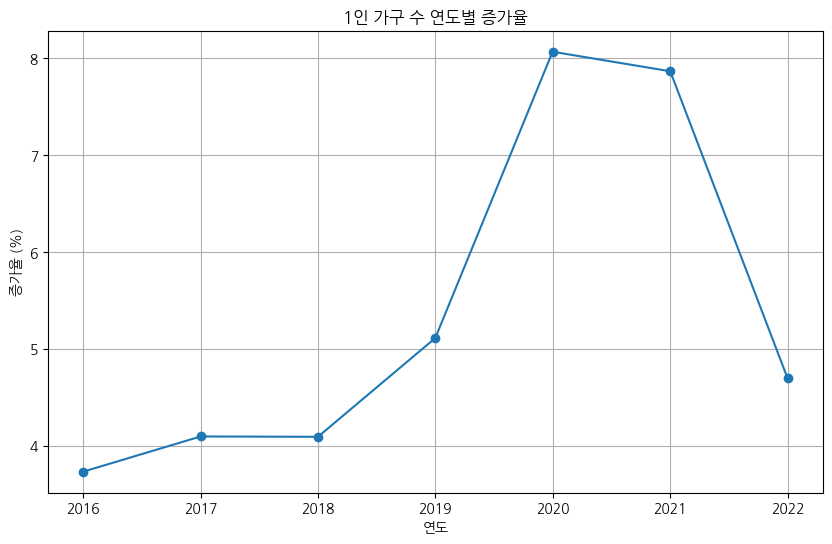

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

ts_growth_rate = pd.Series(growth_rate.values, index=pd.to_datetime(year_columns, format='%Y'))

plt.figure(figsize=(10, 6))
plt.plot(ts_growth_rate.index[1:], ts_growth_rate.values[1:], marker='o', linestyle='-')
plt.title("1인 가구 수 연도별 증가율")
plt.xlabel('연도')
plt.ylabel('증가율 (%)')
plt.grid(True)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

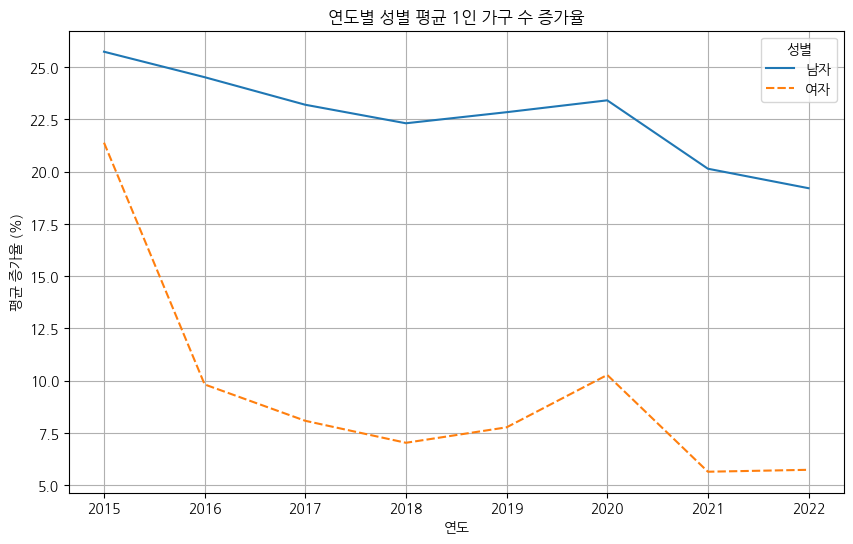

In [ ]:
# 성별별 연도별 평균 증가율 계산
import seaborn as sns
average_growth_by_year_gender = df_growth_rate.groupby(['연도', '성별'])['증가율_성별_연령'].mean().unstack()

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_growth_by_year_gender)
plt.title('연도별 성별 평균 1인 가구 수 증가율')
plt.xlabel('연도')
plt.ylabel('평균 증가율 (%)')
plt.grid(True)
plt.legend(title='성별')
plt.show()

<ipython-input-31-4190a822adef>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_growth_by_year_age = df_growth_rate.groupby(['연도', '연령'])['증가율_성별_연령'].mean().unstack()


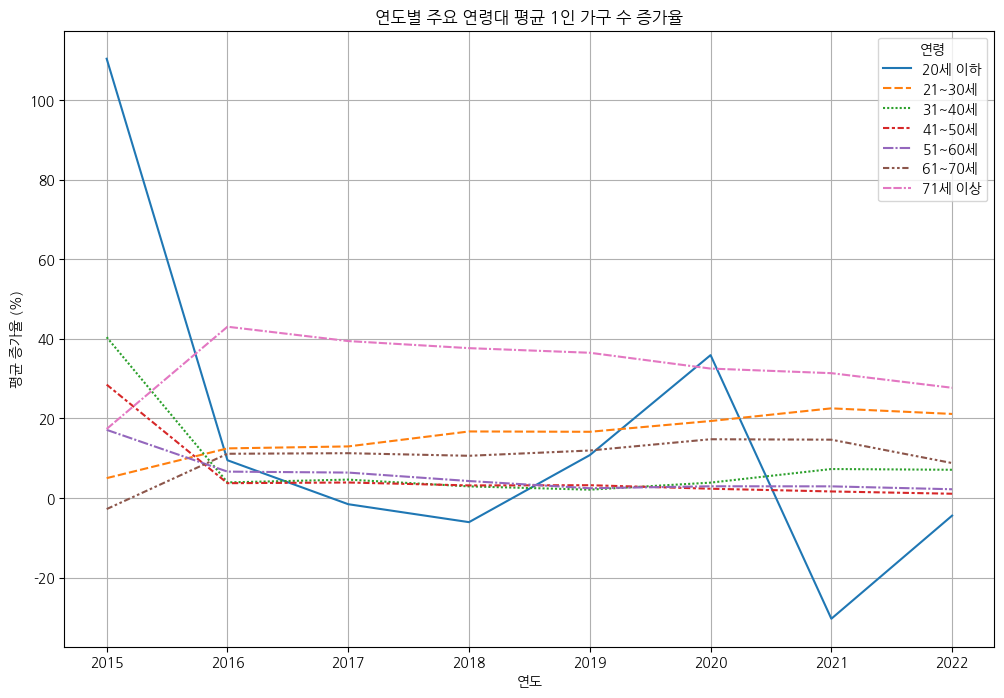

In [ ]:
# 연령별 연도별 평균 증가율 계산
average_growth_by_year_age = df_growth_rate.groupby(['연도', '연령'])['증가율_성별_연령'].mean().unstack()

# 시각화
plt.figure(figsize=(12, 8))
sns.lineplot(data=average_growth_by_year_age[['20세 이하', '21~30세', '31~40세', '41~50세','51~60세','61~70세', '71세 이상']])  # 일부 연령대 선택
plt.title('연도별 주요 연령대 평균 1인 가구 수 증가율')
plt.xlabel('연도')
plt.ylabel('평균 증가율 (%)')
plt.grid(True)
plt.legend(title='연령', loc='upper right')
plt.show()

# 증가율 계산 - 범죄자

In [ ]:
# 전체
import pandas as pd
first_row_criminals = df_criminals_entire.iloc[0].copy()
year_columns_criminals = [col for col in df_criminals_entire.columns if str(col).isdigit()]
criminal_counts_first_row = pd.to_numeric(first_row_criminals[year_columns_criminals], errors='coerce')
growth_rate_criminals_first_row = criminal_counts_first_row.pct_change() * 100
growth_rate_criminals_first_row

,0
2015,NaN
2016,4.302553
2017,-8.775902
2018,-6.143067
2019,0.234904
2020,-5.752700
2021,-16.510809
2022,0.212394


In [ ]:
# 성별
import pandas as pd
total_criminals_by_year_gender = df_criminals_melted.groupby(['연도', '성별'])['범죄자수'].sum().unstack()
total_criminals_by_year_gender_growth_rate = total_criminals_by_year_gender.pct_change() * 100
average_growth_rate_by_gender = total_criminals_by_year_gender_growth_rate.mean()
average_growth_rate_by_gender

,0
성별,
남자,-5.124950
여자,-2.641448


In [ ]:
# 연령별
total_criminals_by_year_age = df_criminals_melted.groupby(['연도', '연령'])['범죄자수'].sum().unstack()
total_criminals_by_year_age_growth_rate = total_criminals_by_year_age.pct_change() * 100
average_growth_rate_by_age = total_criminals_by_year_age_growth_rate.mean()
average_growth_rate_by_age

,0
연령,
20세이하,-4.139299
21-30세,-2.885844
31-40세,-6.832848
41-50세,-7.838566
51-60세,-5.332035
61-70세,3.139193
71세이상,4.467586
미상,9.284778


# 범죄자 증가율 시각화

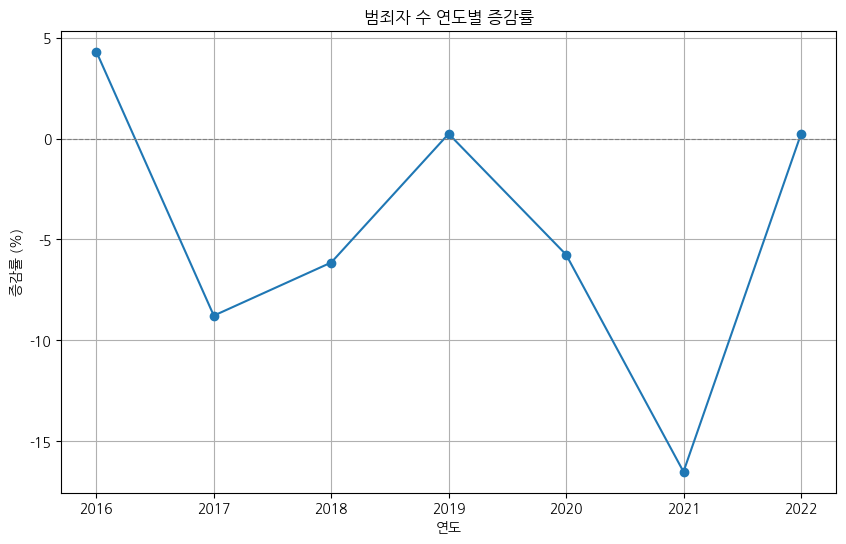

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
plt.plot(growth_rate_criminals_first_row.index, growth_rate_criminals_first_row.values, marker='o', linestyle='-')

plt.title("범죄자 수 연도별 증감률")
plt.xlabel('연도')
plt.ylabel('증감률 (%)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

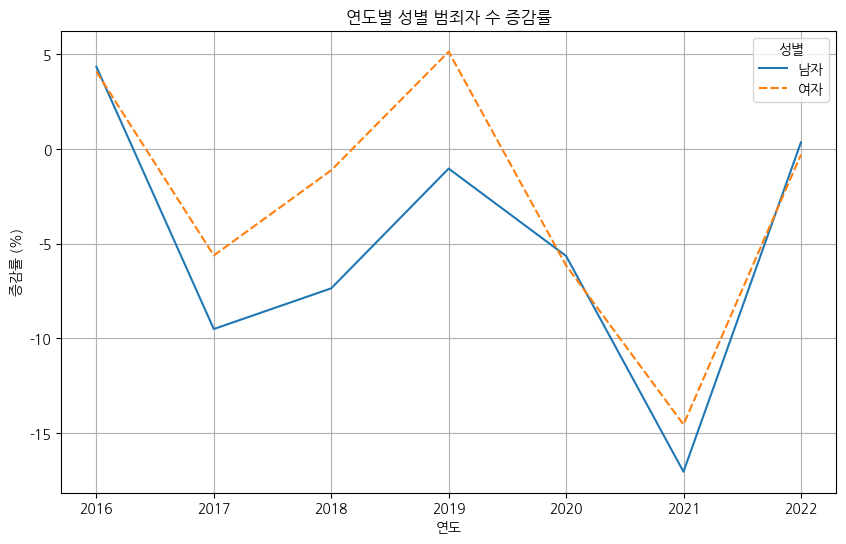

In [ ]:
# 성별별 연도별 평균 증감률 계산 (범죄자수)
import seaborn as sns
import matplotlib.pyplot as plt

# 범죄자수 데이터에서 연도별, 성별별 범죄자수 합계 계산
criminals_by_year_gender = df_criminals_melted.groupby(['연도', '성별'])['범죄자수'].sum().unstack()

# 연도별 성별별 범죄자수 증감률 계산
criminals_growth_rate_by_gender = criminals_by_year_gender.pct_change() * 100

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=criminals_growth_rate_by_gender)
plt.title('연도별 성별 범죄자 수 증감률')
plt.xlabel('연도')
plt.ylabel('증감률 (%)')
plt.grid(True)
plt.legend(title='성별')
plt.show()

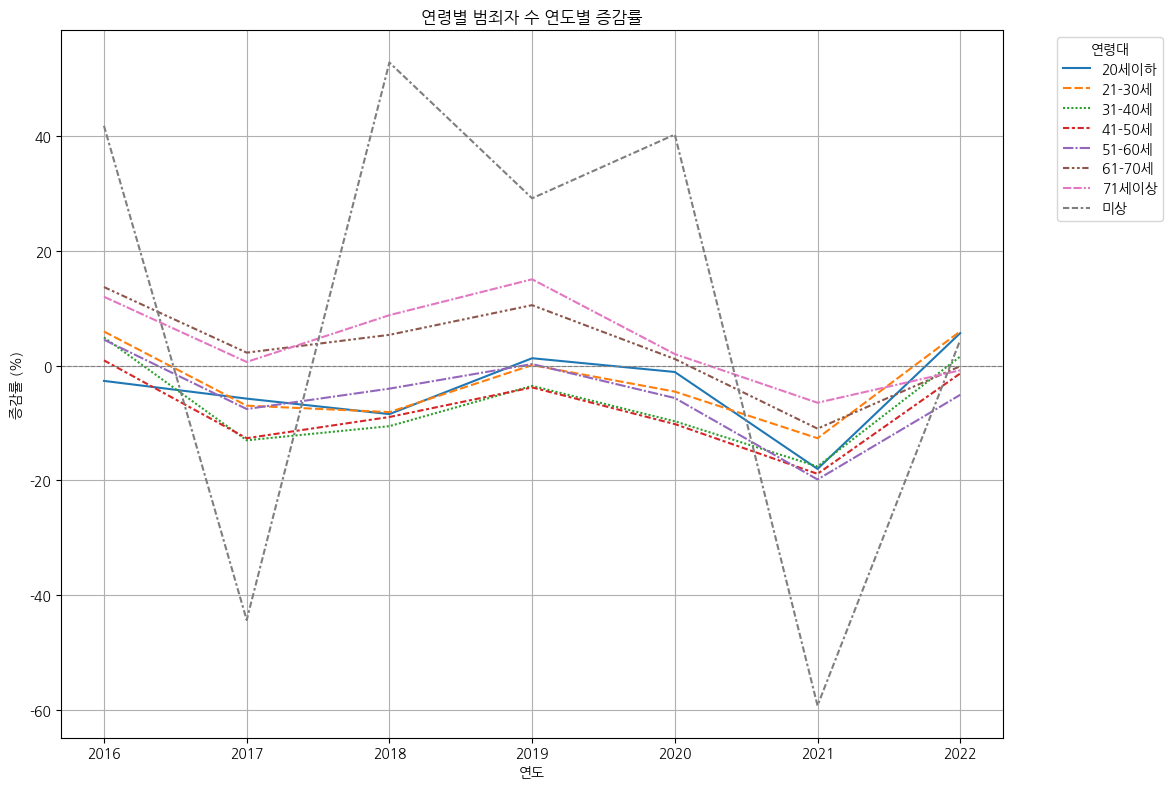

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

criminals_by_year_age = df_criminals_melted.groupby(['연도', '연령'])['범죄자수'].sum().unstack()
criminals_growth_rate_by_age = criminals_by_year_age.pct_change() * 100

plt.figure(figsize=(14, 8))
sns.lineplot(data=criminals_growth_rate_by_age)
plt.title('연령별 범죄자 수 연도별 증감률')
plt.xlabel('연도')
plt.ylabel('증감률 (%)')
plt.grid(True)
plt.legend(title='연령대', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

# 병합

In [ ]:
# 범죄자 연령 범주를 기준으로 함수 생성
def map_crime_age_group(age):
    if "세이하" in age or "20세 이하" in age:
        return '20세 이하'
    elif "21-30세" in age:
        return '21~30세'
    elif "31-40세" in age:
        return '31~40세'
    elif "41-50세" in age:
        return '41~50세'
    elif "51-60세" in age:
        return '51~60세'
    elif "61-70세" in age:
        return '61~70세'
    elif "71세이상" in age:
        return '71세 이상'
    else:
        return '기타'

# 1인가구 연령 그룹 매핑
def map_household_age_group(age):
    age = str(age)
    if '20세 이하' in age:
        return '20세 이하'
    elif '21~30세' in age:
        return '21~30세'
    elif '31~40세' in age:
        return '31~40세'
    elif '41~50세' in age:
        return '41~50세'
    elif '51~60세' in age:
        return '51~60세'
    elif '61~70세' in age:
        return '61~70세'
    elif '71세 이상' in age:
        return '71세 이상'
    else:
        return '기타'
# 새로운 열로 변환
df_criminals_melted['연령대'] = df_criminals_melted['연령'].apply(map_crime_age_group)
df_household_melted['연령대'] = df_household_melted['연령'].apply(map_household_age_group)

# 시도 단위 제거 (1인가구는 전국합 기준으로 집계)
df_household_grouped = df_household_melted.groupby(['연도', '성별', '연령대'])['1인가구수'].sum().reset_index()

# 범죄자 데이터에서 필요한 부분만
df_criminals_grouped = df_criminals_melted.groupby(['연도', '성별', '연령대'])['범죄자수'].sum().reset_index()

# 병합
df_merged = pd.merge(df_criminals_grouped, df_household_grouped, on=['연도', '성별', '연령대'], how='inner')
df_merged.to_csv('df_merged.csv', index=False)

In [ ]:
df_merged

,연도,성별,연령대,범죄자수,1인가구수
0,2015,남자,20세 이하,102265,28049
1,2015,남자,21~30세,230062,484759
2,2015,남자,31~40세,292020,610233
3,2015,남자,41~50세,360791,542018
4,2015,남자,51~60세,313031,477685
...,...,...,...,...,...
107,2022,여자,31~40세,46237,474848
108,2022,여자,41~50세,55655,358104
109,2022,여자,51~60세,57710,477103
110,2022,여자,61~70세,35748,687284


# 상관관계

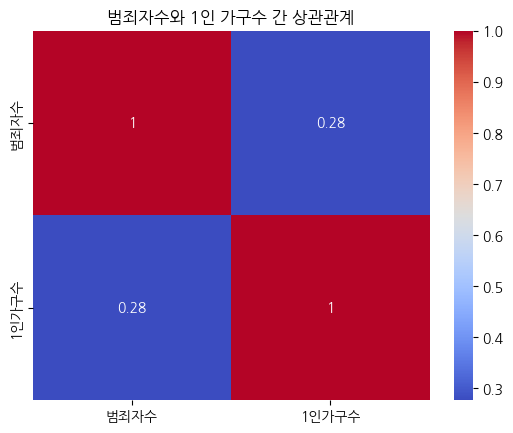

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산
correlation = df_merged[['범죄자수', '1인가구수']].corr()

# 히트맵 시각화
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0, linecolor=None)
plt.title('범죄자수와 1인 가구수 간 상관관계')
plt.grid(False)
plt.show()

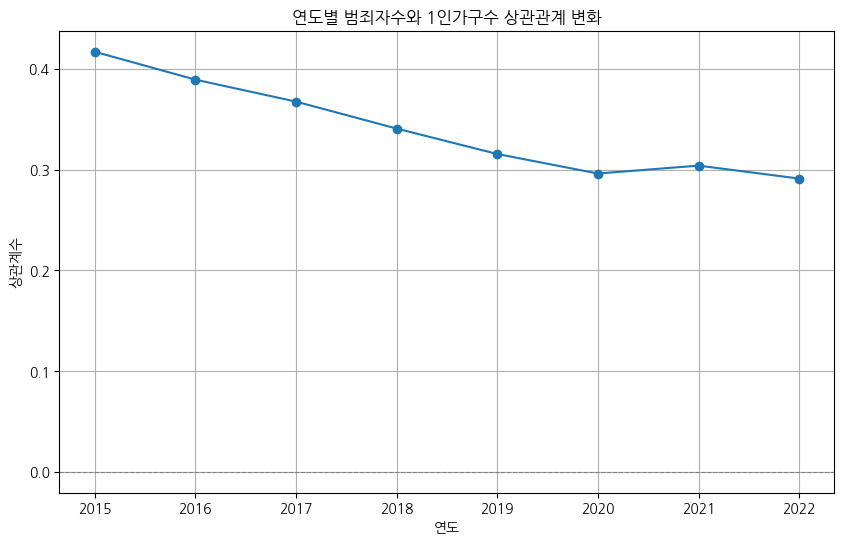

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 연도별로 그룹화하여 상관관계 계산
yearly_correlation = df_merged.groupby('연도')[['범죄자수', '1인가구수']].corr().unstack().iloc[:, 1]

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(yearly_correlation.index, yearly_correlation.values, marker='o', linestyle='-')
plt.title('연도별 범죄자수와 1인가구수 상관관계 변화')
plt.xlabel('연도')
plt.ylabel('상관계수')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # 상관계수 0 기준선
plt.show()

In [ ]:
# 그룹별 상관계수 계산
group_corr = df_merged.groupby(['성별', '연령대'])[['범죄자수', '1인가구수']].corr().iloc[0::2, -1].reset_index()

# 보기 쉽게 피벗 테이블 형태로 변경
group_corr_pivot = group_corr.pivot(index='연령대', columns='성별', values='1인가구수')
group_corr_pivot

성별,남자,여자
연령대,,
20세 이하,0.431245,0.201967
21~30세,-0.948436,-0.643196
31~40세,-0.922869,-0.957759
41~50세,-0.907726,-0.982448
51~60세,-0.967889,-0.865984
61~70세,0.438582,0.779428
71세 이상,0.662312,0.943265


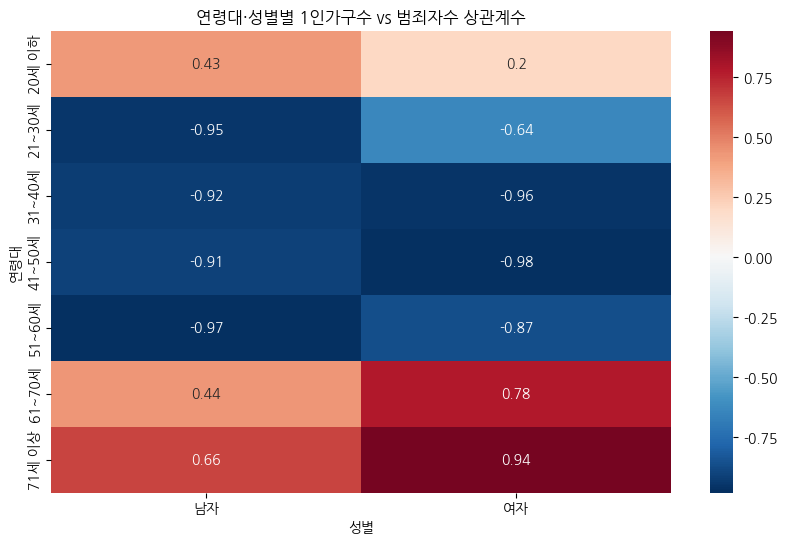

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(group_corr_pivot, annot=True, cmap='RdBu_r', center=0)
plt.title('연령대·성별별 1인가구수 vs 범죄자수 상관계수')
plt.show()

| 연령대     | 남자 상관계수 | 여자 상관계수 | 해석 요약                                                   |
| ------- | ------- | ------- | ------------------------------------------------------- |
| 20세 이하  | 0.43    | 0.20    | **약한 양의 상관관계** – 1인 가구 증가 시 범죄자 수도 소폭 증가하는 경향           |
| 21\~30세 | -0.95   | -0.64   | **매우 강한 음의 상관관계** – 1인 가구 많을수록 범죄자 수는 감소                |
| 31\~40세 | -0.92   | -0.96   | **매우 강한 음의 상관관계** – 특히 여성에서 뚜렷하게 나타남                    |
| 41\~50세 | -0.91   | -0.98   | **매우 강한 음의 상관관계** – 여성에서 극단적으로 강한 감소 경향                 |
| 51\~60세 | -0.97   | -0.87   | **매우 강한 음의 상관관계** – 남성에서 특히 강함                          |
| 61\~70세 | 0.44    | 0.78    | **중간\~강한 양의 상관관계** – 나이 든 여성에서 특히 1인 가구가 늘면 범죄자 수 증가 경향 |
| 71세 이상  | 0.66    | 0.94    | **강한 양의 상관관계** – 고령 여성 1인 가구가 증가하면 범죄자 수 증가 가능성 높음      |


1. 청·중년층 (20~60세)

전반적으로 강한 음의 상관관계

→ 1인 가구 수가 많을수록 범죄자 수가 줄어드는 경향

특히 30~50대 여성은 -0.95 이상으로 거의 선형적인 감소

👉 이 연령대는 1인 가구 수 증가가 범죄와 부정적인 관련성을 가짐

📌 해석 가능성:

1인 가구 증가가 자립적인 삶을 의미할 수 있고,

사회적으로 안정된 인구층이 될 가능성 높음


2. 노년층 (61세 이상)

양의 상관관계로 반전됨, 특히 여성 71세 이상은 0.94

👉 1인 가구 수가 많아질수록 범죄자 수도 많아지는 경향

📌 해석 가능성:

노년층의 고립, 경제적 어려움, 정신건강 문제 등이 원인일 수 있음

특히 여성 고령자에서 취약성 증가

In [ ]:
df_merged

,연도,성별,연령대,범죄자수,1인가구수
0,2015,남자,20세 이하,102265,28049
1,2015,남자,21~30세,230062,484759
2,2015,남자,31~40세,292020,610233
3,2015,남자,41~50세,360791,542018
4,2015,남자,51~60세,313031,477685
...,...,...,...,...,...
107,2022,여자,31~40세,46237,474848
108,2022,여자,41~50세,55655,358104
109,2022,여자,51~60세,57710,477103
110,2022,여자,61~70세,35748,687284


# ARIMA - 1인 가구 수

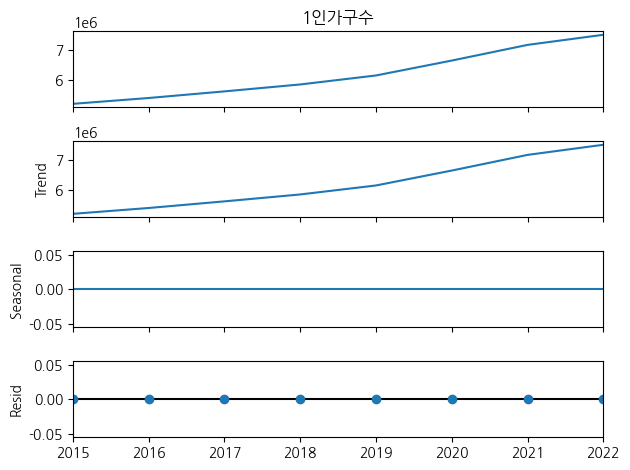

1인 가구 수 - ADF 통계량: 5.66425817901016
1인 가구 수 - p-value: 1.0


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check

                               SARIMAX Results                                
Dep. Variable:                  1인가구수   No. Observations:                    8
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -92.677
Date:                Wed, 04 Jun 2025   AIC                            191.354
Time:                        06:23:20   BIC                            191.191
Sample:                    01-01-2015   HQIC                           189.348
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.017     58.233      0.000       0.966       1.034
ma.L1         -0.9971      0.391     -2.552      0.011      -1.763      -0.231
sigma2      9.199e+09   2.85e-11   3.22e+20      0.0

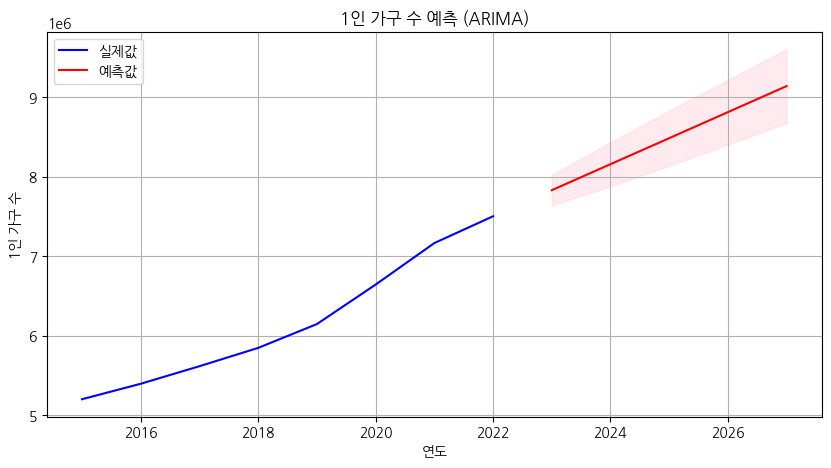

In [ ]:
# 1. 전처리: 연도별 총 1인 가구 수 집계
import pandas as pd
import matplotlib.pyplot as plt

ts_household_data = df_merged.groupby('연도')['1인가구수'].sum().sort_index()

# 2. 시계열 분해 및 시각화
from statsmodels.tsa.seasonal import seasonal_decompose
if not isinstance(ts_household_data.index, pd.DatetimeIndex) and not isinstance(ts_household_data.index, pd.PeriodIndex):
     ts_household_data.index = pd.to_datetime(ts_household_data.index, format='%Y')

decomp_household = seasonal_decompose(ts_household_data, model='additive', period=1)
decomp_household.plot()
plt.tight_layout()
plt.show()

# 3. ADF Test (정상성 확인)
from statsmodels.tsa.stattools import adfuller

result_household = adfuller(ts_household_data)
print(f"1인 가구 수 - ADF 통계량: {result_household[0]}")
print(f"1인 가구 수 - p-value: {result_household[1]}")


# 4. ARIMA 모델 적합 및 예측
from statsmodels.tsa.arima.model import ARIMA

if isinstance(ts_household_data.index, pd.PeriodIndex):
     ts_household_data.index = ts_household_data.index.to_timestamp()
try:
    model_household = ARIMA(ts_household_data, order=(1, 1, 1))
    fit_model_household = model_household.fit()

    print(fit_model_household.summary())
    forecast_household = fit_model_household.get_forecast(steps=5)
    forecast_ci_household = forecast_household.conf_int()

# 5. 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(ts_household_data, label='실제값', color='blue')
    plt.plot(forecast_household.predicted_mean, label='예측값', color='red')
    plt.fill_between(forecast_ci_household.index,
                     forecast_ci_household.iloc[:, 0],
                     forecast_ci_household.iloc[:, 1], color='pink', alpha=0.3)
    plt.title('1인 가구 수 예측 (ARIMA)')
    plt.xlabel('연도')
    plt.ylabel('1인 가구 수')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error fitting or forecasting ARIMA model for household data: {e}")

# ARIMA - 범죄자 수

In [ ]:
# 1. 전처리: 연도별 총 범죄자 수 집계
import pandas as pd

# 연도별 전체 범죄자 수 집계
ts_data = df_merged.groupby('연도')['범죄자수'].sum().sort_index()
ts_data

,범죄자수
연도,
2015,1769302
2016,1844644
2017,1683813
2018,1579403
2019,1582384
2020,1489856
2021,1245820
2022,1248387


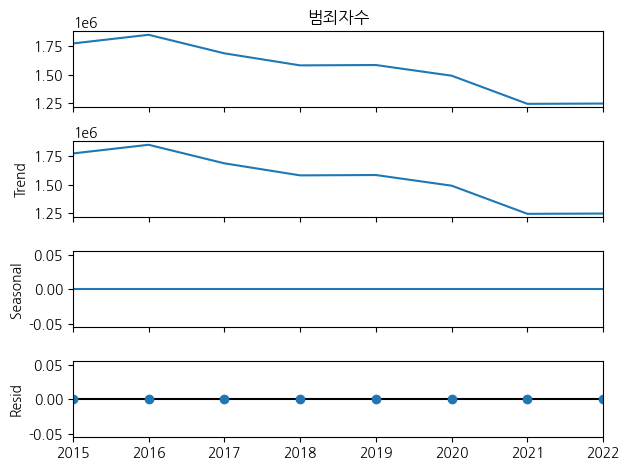

In [ ]:
#  2. 시계열 분해 및 시각화
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 분해
decomp = seasonal_decompose(ts_data, model='additive', period=1)
decomp.plot()
plt.tight_layout()
plt.show()


In [ ]:
# ADF Test (정상성 확인)
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts_data)
print(f"ADF 통계량: {result[0]}")
print(f"p-value: {result[1]}")

ADF 통계량: 1.0192092881676178
p-value: 0.99446455024336


In [ ]:
#  4. ARIMA 모델 적합
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts_data, order=(1, 1, 1))
fit_model = model.fit()

print(fit_model.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

                               SARIMAX Results                                
Dep. Variable:                   범죄자수   No. Observations:                    8
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -91.519
Date:                Wed, 04 Jun 2025   AIC                            189.038
Time:                        06:23:23   BIC                            188.875
Sample:                             0   HQIC                           187.032
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4627      1.044     -0.443      0.658      -2.510       1.584
ma.L1          0.5319      0.920      0.578      0.563      -1.271       2.335
sigma2      1.399e+10   2.06e-11   6.78e+20      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


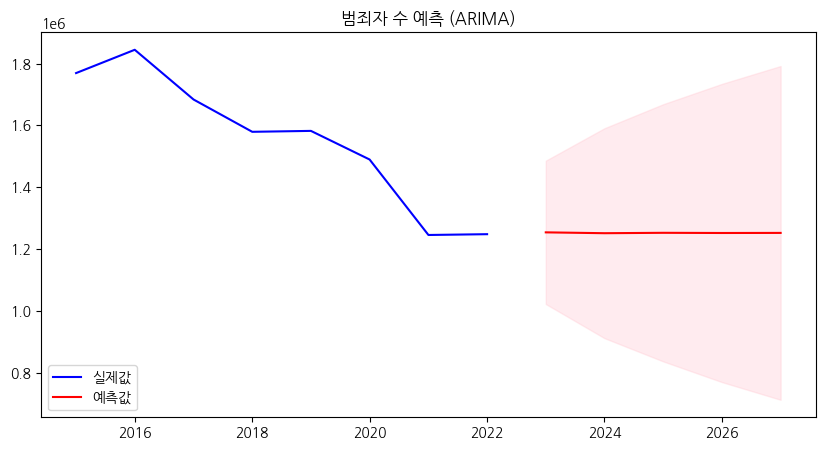

In [ ]:
ts_data = df_merged.groupby('연도')['범죄자수'].sum().sort_index()

ts_data.index = pd.period_range(start=f'{ts_data.index.min()}', periods=len(ts_data), freq='Y')

ts_data.index = ts_data.index.to_timestamp()

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts_data, order=(1, 1, 1))
fit_model = model.fit()

forecast = fit_model.get_forecast(steps=5)
forecast_ci = forecast.conf_int()

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(ts_data, label='실제값', color='blue')
plt.plot(forecast.predicted_mean, label='예측값', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('범죄자 수 예측 (ARIMA)')
plt.legend()
plt.show()

# VARIMA

ADF 통계량: 1.0192092881676178
p-value: 0.99446455024336
ADF Statistic: -3.3227922876092495, p-value: 0.013889895409957049


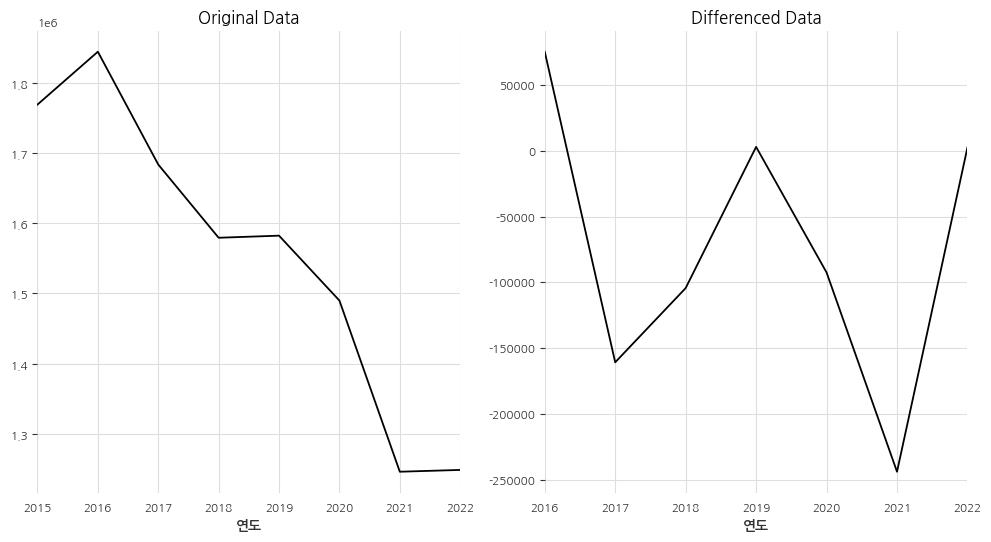

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# 연도별 범죄자 수 합계 시계열 생성
ts_data = df_merged.groupby('연도')['범죄자수'].sum().sort_index()

# ADF Test (정상성 확인)
result = adfuller(ts_data)
print(f"ADF 통계량: {result[0]}")
print(f"p-value: {result[1]}")

# 차분 (예시: 1차 차분)
y_diff = ts_data.diff().dropna()

# 차분 후 ADF Test
result = adfuller(y_diff)
print(f"ADF Statistic: {result[0]}, p-value: {result[1]}")

# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ts_data.plot(ax=plt.gca(), title='Original Data')
plt.subplot(1, 2, 2)
y_diff.plot(ax=plt.gca(), title='Differenced Data')
plt.show()

In [ ]:
import pmdarima as pm
import numpy as np

# auto_arima를 사용하여 최적의 ARIMA 차수 탐색
model = pm.auto_arima(ts_data, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

print(model.order)  # 최적 차수 출력


p = 1  # AR 차수
d = 1  # 차분 차수
q = 1  # MA 차수
P = 0  # 계절성 AR 차수
D = 0  # 계절성 차분 차수
Q = 0  # 계절성 MA 차수
s = 0  # 계절 주기

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=252.959, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=249.537, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=225.951, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=227.983, Time=0.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=223.972, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=224.632, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=229.983, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=219.631, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=222.523, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=218.345, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=230.424, Time=0.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 4.597 seconds
(1, 0, 0)


In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
import pandas as pd

data = df_merged.groupby('연도')[['범죄자수', '1인가구수']].sum()

data['범죄자수'] = pd.to_numeric(data['범죄자수'], errors='coerce')
data['1인가구수'] = pd.to_numeric(data['1인가구수'], errors='coerce')

data = data.dropna()
data_diff = data.diff().dropna()
model = VARMAX(data_diff, order=(1, 1), trend='c')

model_fit = model.fit(disp=False)

print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                           Statespace Model Results                           
Dep. Variable:      ['범죄자수', '1인가구수']   No. Observations:                    7
Model:                     VARMA(1,1)   Log Likelihood                -177.639
                          + intercept   AIC                            381.277
Date:                Wed, 04 Jun 2025   BIC                            380.574
Time:                        06:34:19   HQIC                           372.586
Sample:                    01-01-2016                                         
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.42, 0.19   Jarque-Bera (JB):           0.32, 0.21
Prob(Q):                        0.52, 0.67   Prob(JB):                   0.85, 0.90
Heteroskedasticity (H):         0.64, 0.31   Skew:                      -0.10, 0.32
Prob(H) (two-sided):            0.78,

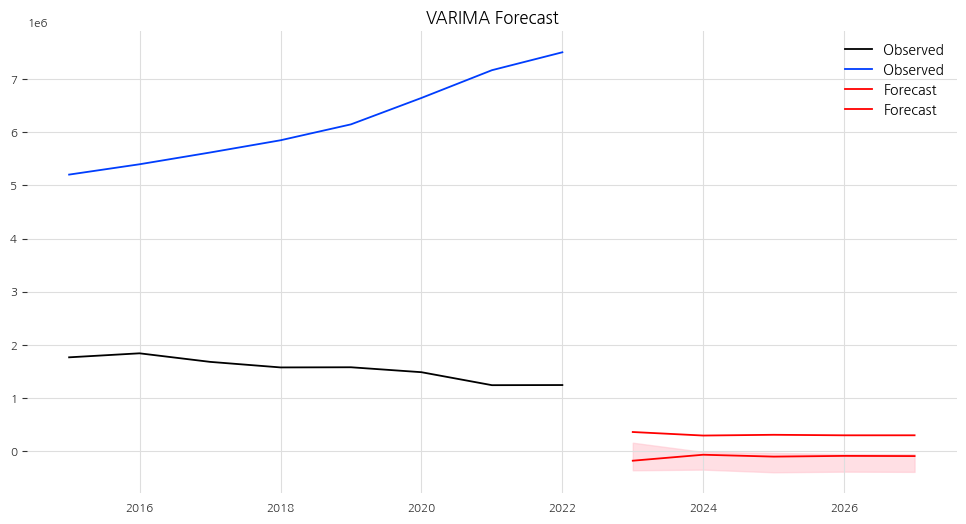

                     범죄자수          1인가구수
2023-01-01 -173681.898934  365540.767177
2024-01-01  -61596.169627  299195.519167
2025-01-01  -96776.134121  313307.820081
2026-01-01  -83197.538960  303540.305650
2027-01-01  -86805.433420  303873.784562


In [ ]:
# 예측
forecast_result = model_fit.get_forecast(steps=5)
forecast = forecast_result.predicted_mean
confidence_intervals = forecast_result.conf_int(alpha=0.05)  # 95% 신뢰구간

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(data, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.5)
plt.legend()
plt.title('VARIMA Forecast')
plt.show()

# 결과 해석
print(forecast)

#  범죄자수 관련 요인 및 시계열 예측 모델링


[1] 범죄자수와 1인가구수 상관관계 분석
           범죄자수     1인가구수
범죄자수   1.000000  0.276516
1인가구수  0.276516  1.000000


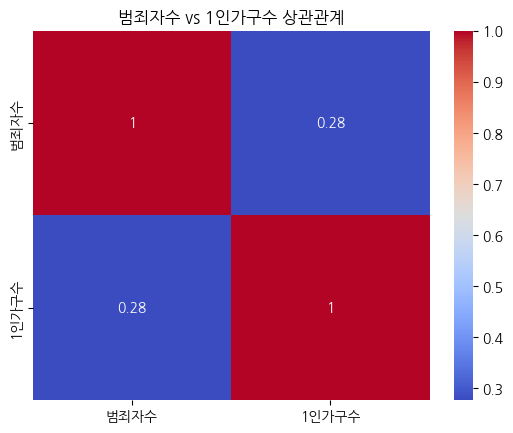


[2] ARIMA 예측 - 연도별 범죄자수
ADF Statistic: 1.0192092881676167
p-value: 0.99446455024336


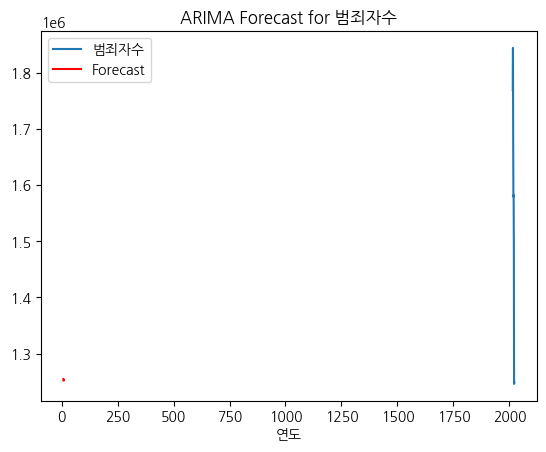


[3] 회귀 분석 (범죄자수 ~ 1인가구수)
회귀 계수 (slope): 0.11355494358300616
절편 (intercept): 60888.70876619016
R^2 score: 0.07646110767769021


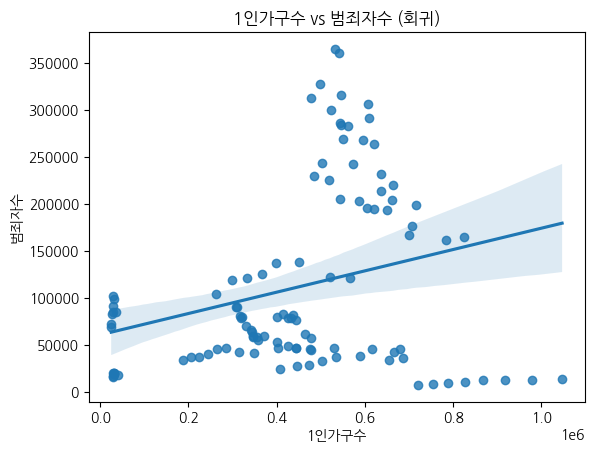


[4] 연도·성별·연령대별 시각화


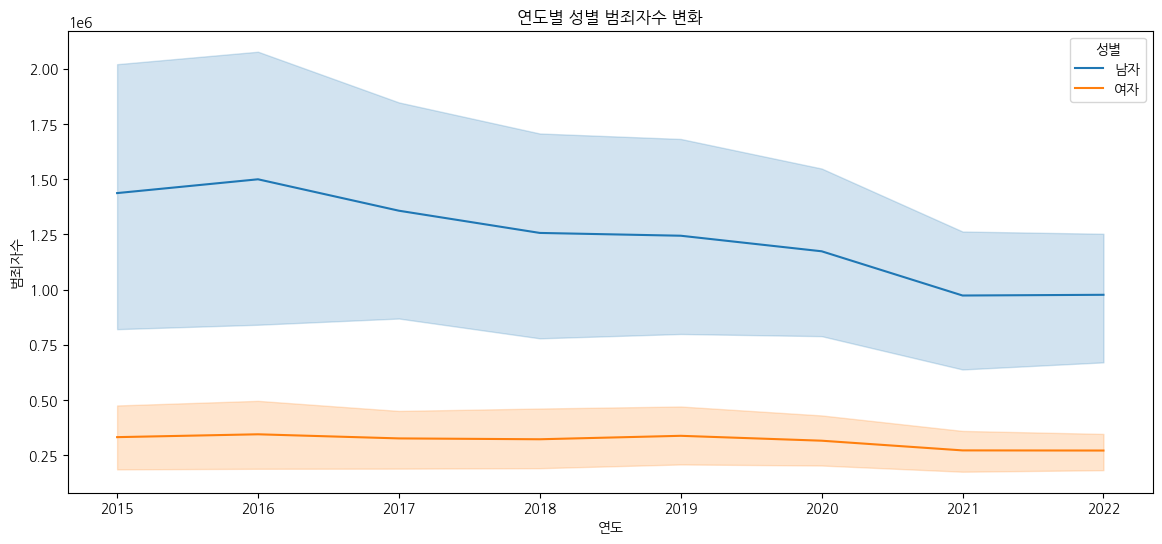

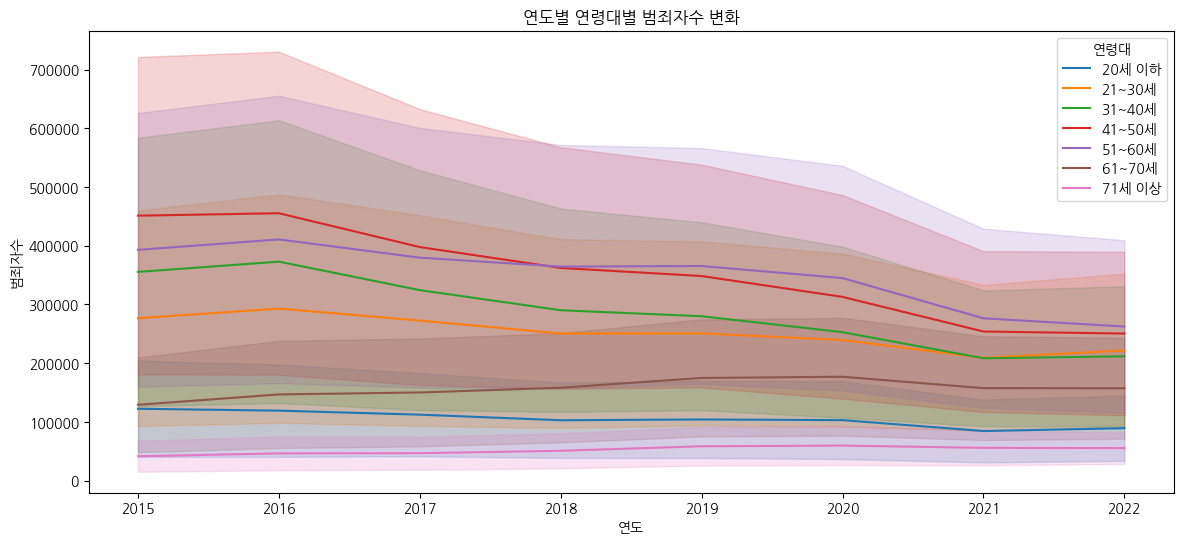

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# 1. ✅ 상관관계 분석
print("\n[1] 범죄자수와 1인가구수 상관관계 분석")
corr = df_merged[['범죄자수', '1인가구수']].corr()
print(corr)

# 시각화
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("범죄자수 vs 1인가구수 상관관계")
plt.show()

# 2. ✅ ARIMA 단일 시계열 예측 (연도별 범죄자수 합계)
print("\n[2] ARIMA 예측 - 연도별 범죄자수")

df_year = df_merged.groupby('연도')[['범죄자수']].sum()

# 정상성 확인
result = adfuller(df_year['범죄자수'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# 차분이 필요한 경우 차분 적용
if result[1] > 0.05:
    df_diff = df_year.diff().dropna()
else:
    df_diff = df_year

# ARIMA 모델 학습
model = ARIMA(df_year, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=3)

# 예측 시각화
df_year.plot(label='Observed')
forecast.plot(label='Forecast', color='red', legend=True)
plt.title('ARIMA Forecast for 범죄자수')
plt.show()

# 3. ✅ 회귀 분석 (범죄자수 ~ 1인가구수)
print("\n[3] 회귀 분석 (범죄자수 ~ 1인가구수)")
X = df_merged[['1인가구수']]
y = df_merged['범죄자수']

reg = LinearRegression()
reg.fit(X, y)

print("회귀 계수 (slope):", reg.coef_[0])
print("절편 (intercept):", reg.intercept_)
print("R^2 score:", reg.score(X, y))

# 회귀 시각화
sns.regplot(x='1인가구수', y='범죄자수', data=df_merged)
plt.title("1인가구수 vs 범죄자수 (회귀)")
plt.show()

# 4. ✅ 연도별/성별/연령대별 시각화
print("\n[4] 연도·성별·연령대별 시각화")

plt.figure(figsize=(14,6))
sns.lineplot(data=df_merged, x='연도', y='범죄자수', hue='성별', estimator='sum')
plt.title("연도별 성별 범죄자수 변화")
plt.show()

plt.figure(figsize=(14,6))
sns.lineplot(data=df_merged, x='연도', y='범죄자수', hue='연령대', estimator='sum')
plt.title("연도별 연령대별 범죄자수 변화")
plt.show()


#  VAR - 전체 범죄자수와 1인 가구수 간의 관계 및 예측

In [ ]:
import pandas as pd

# 연도별 범죄자수 및 1인가구수 합계 계산 (다변량 시계열용)
df_yearly = df_merged.groupby("연도")[["범죄자수", "1인가구수"]].sum().reset_index()
df_yearly.set_index("연도", inplace=True)


In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name):
    result = adfuller(series)
    print(f"ADF Test: {name}")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("→ 정상 시계열입니다.\n")
    else:
        print("→ 비정상 시계열입니다. 차분이 필요합니다.\n")

adf_test(df_yearly["범죄자수"], "범죄자수")
adf_test(df_yearly["1인가구수"], "1인가구수")


ADF Test: 범죄자수
ADF Statistic: 1.0192092881676167
p-value: 0.99446455024336
→ 비정상 시계열입니다. 차분이 필요합니다.

ADF Test: 1인가구수
ADF Statistic: 5.664258179010158
p-value: 1.0
→ 비정상 시계열입니다. 차분이 필요합니다.



In [ ]:
# 1차 차분
df_diff = df_yearly.diff().dropna()

# 다시 ADF Test
adf_test(df_diff["범죄자수"], "범죄자수 (1차 차분)")
adf_test(df_diff["1인가구수"], "1인가구수 (1차 차분)")


ADF Test: 범죄자수 (1차 차분)
ADF Statistic: -3.322792287609249
p-value: 0.013889895409957049
→ 정상 시계열입니다.

ADF Test: 1인가구수 (1차 차분)
ADF Statistic: -2.11661415442259
p-value: 0.23788665678913357
→ 비정상 시계열입니다. 차분이 필요합니다.



In [ ]:
from statsmodels.tsa.api import VAR

# VAR 모델 적합
model = VAR(df_diff)
results = model.fit(maxlags=1)  # 자동 선택: fit(ic='aic')도 가능

# 요약 출력
print(results.summary())

# 예측 (예: 3년 후까지)
forecast = results.forecast(df_diff.values, steps=3)

# 예측 결과 정리
forecast_df = pd.DataFrame(forecast, columns=df_diff.columns)
forecast_df.index = range(df_yearly.index.max() + 1, df_yearly.index.max() + 1 + 3)
print("예측 결과:")
print(forecast_df)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Jun, 2025
Time:                     14:21:46
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    46.5427
Nobs:                     6.00000    HQIC:                   45.9174
Log likelihood:          -151.280    FPE:                2.45096e+20
AIC:                      46.7510    Det(Omega_mle):     1.08932e+20
--------------------------------------------------------------------
Results for equation 범죄자수
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const       -45500.975069    106049.364615           -0.429           0.668
L1.범죄자수         -0.638951         0.449091           -1.423           0.155
L1.1인가구수        -0.335175         0.351757           -0.953           0.341

Resu

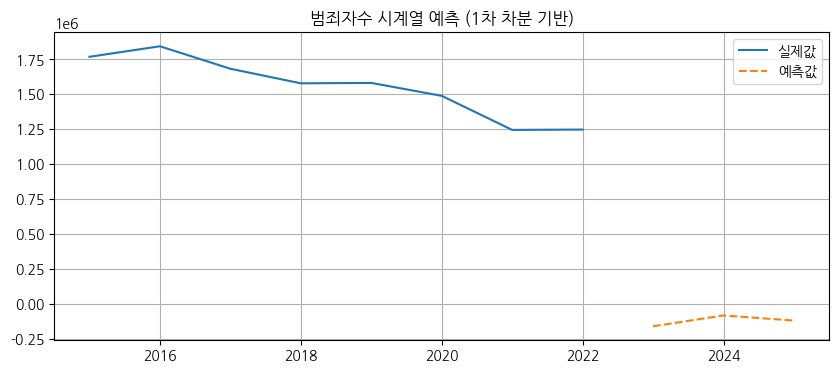

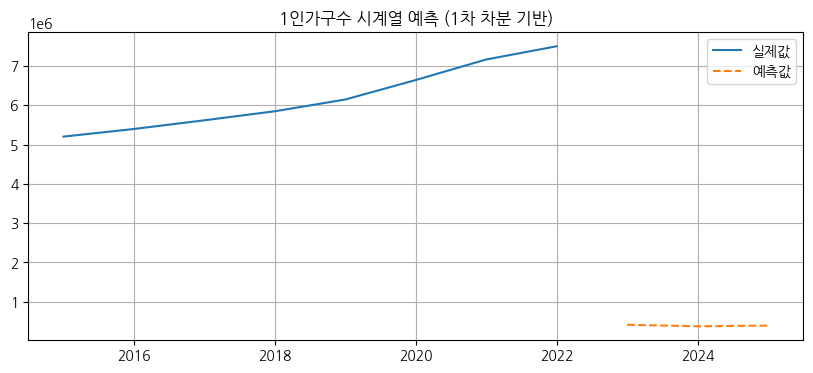

In [ ]:
import matplotlib.pyplot as plt

# 실제 데이터 + 예측 결과 비교
for col in df_diff.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df_yearly[col], label='실제값')
    forecast_series = pd.Series(forecast_df[col].values, index=forecast_df.index)
    plt.plot(forecast_series, label='예측값', linestyle='--')
    plt.title(f'{col} 시계열 예측 (1차 차분 기반)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# 예측 결과 복원 (1차 차분 → 실제값)
last_actual = df_yearly.iloc[-1]
forecast_cumsum = forecast_df.cumsum()
forecast_recovered = forecast_cumsum + last_actual

print("복원된 예측값:")
print(forecast_recovered)


복원된 예측값:
              범죄자수         1인가구수
2023  1.088439e+06  7.917297e+06
2024  1.006057e+06  8.294059e+06
2025  8.869127e+05  8.688415e+06


# 연령별 1인가구 & 범죄자 수

분석할 연령대: ['20세 이하' '21~30세' '31~40세' '41~50세' '51~60세' '61~70세' '71세 이상']

          분석 시작: 연령대 '20세 이하'

--- 안정성 검정 ---
ADF Test: 범죄자수
ADF Statistic: -7.9012
p-value: 0.0000
=> 정상
ADF Test: 1인가구수
ADF Statistic: -3.2493
p-value: 0.0173
=> 정상


--- VAR 모델 적합 결과 ---
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Jun, 2025
Time:                     14:33:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    33.2602
Nobs:                     6.00000    HQIC:                   32.6348
Log likelihood:          -111.432    FPE:                4.17631e+14
AIC:                      33.4684    Det(Omega_mle):     1.85614e+14
--------------------------------------------------------------------
Results for equation 범죄자수
              coefficient       std. error           t-stat            prob
--------------------------------------------

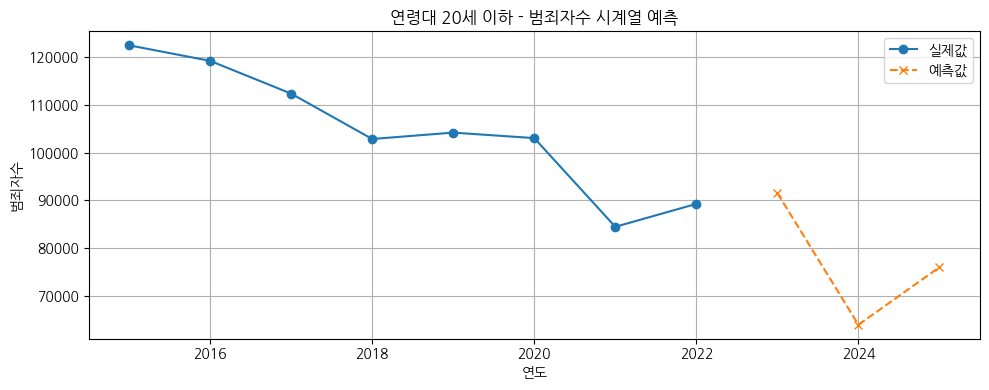

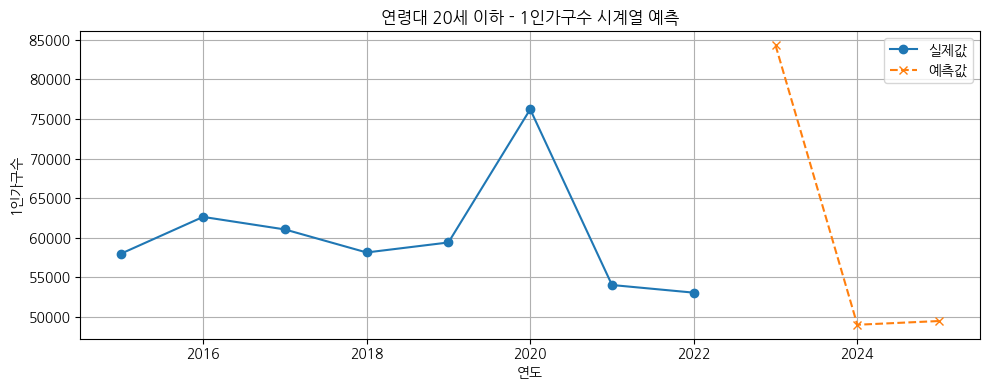


          분석 종료: 연령대 '20세 이하'


          분석 시작: 연령대 '21~30세'

--- 안정성 검정 ---
ADF Test: 범죄자수
ADF Statistic: -0.0793
p-value: 0.9515
=> 비정상
ADF Test: 1인가구수
ADF Statistic: 0.4330
p-value: 0.9827
=> 비정상


--- VAR 모델 적합 결과 ---
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Jun, 2025
Time:                     14:33:11
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    41.1665
Nobs:                     7.00000    HQIC:                   40.9910
Log likelihood:          -162.002    FPE:                7.70591e+17
AIC:                      41.1820    Det(Omega_mle):     5.89984e+17
--------------------------------------------------------------------
Results for equation 범죄자수
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const     -7842

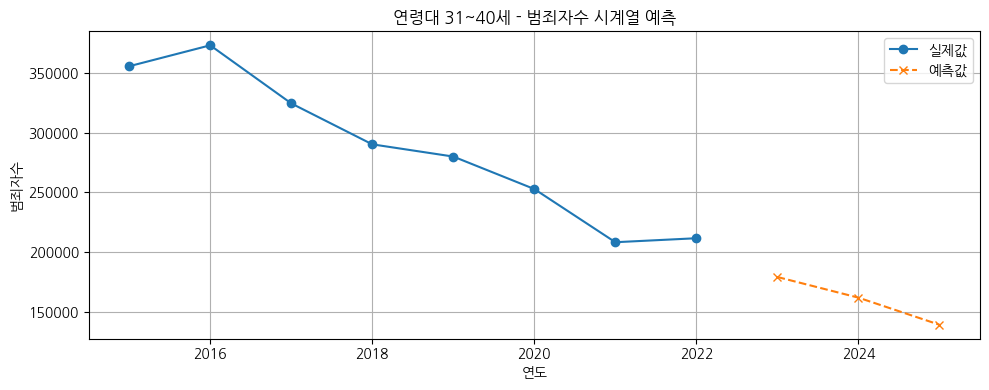

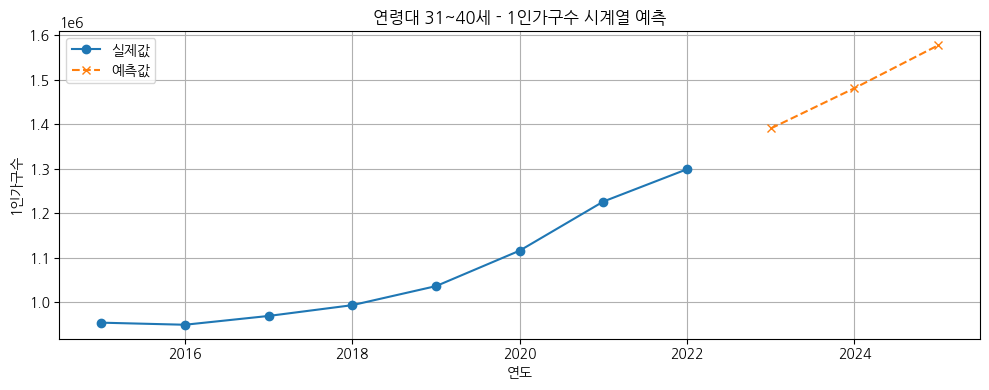


          분석 종료: 연령대 '31~40세'


          분석 시작: 연령대 '41~50세'

--- 안정성 검정 ---
ADF Test: 범죄자수
ADF Statistic: 0.1734
p-value: 0.9707
=> 비정상
ADF Test: 1인가구수
ADF Statistic: 1.5187
p-value: 0.9976
=> 비정상


--- VAR 모델 적합 결과 ---
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Jun, 2025
Time:                     14:33:11
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    38.5576
Nobs:                     6.00000    HQIC:                   37.9322
Log likelihood:          -127.325    FPE:                8.34540e+16
AIC:                      38.7658    Det(Omega_mle):     3.70907e+16
--------------------------------------------------------------------
Results for equation 범죄자수
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const     

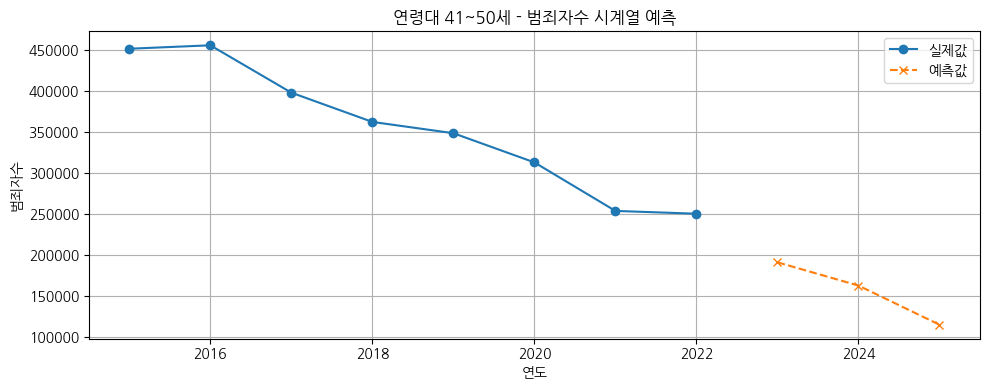

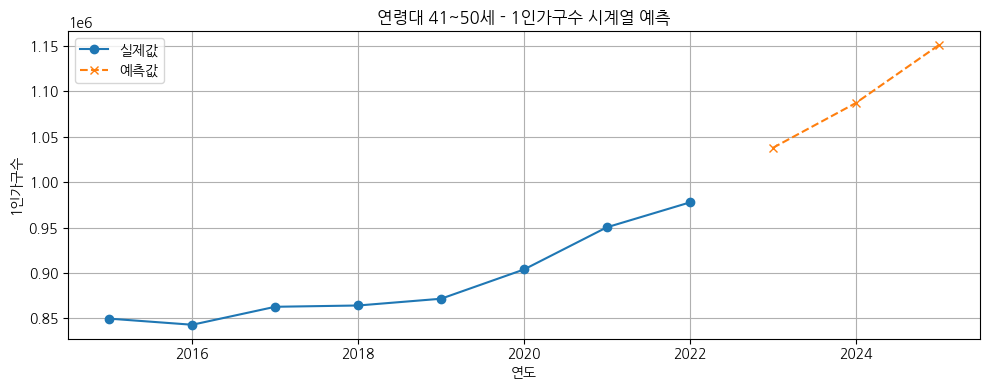


          분석 종료: 연령대 '41~50세'


          분석 시작: 연령대 '51~60세'

--- 안정성 검정 ---
ADF Test: 범죄자수
ADF Statistic: 1.3934
p-value: 0.9971
=> 비정상
ADF Test: 1인가구수
ADF Statistic: 0.9148
p-value: 0.9933
=> 비정상


--- VAR 모델 적합 결과 ---
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Jun, 2025
Time:                     14:33:12
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    38.3895
Nobs:                     7.00000    HQIC:                   38.2140
Log likelihood:          -152.283    FPE:                4.79490e+16
AIC:                      38.4050    Det(Omega_mle):     3.67110e+16
--------------------------------------------------------------------
Results for equation 범죄자수
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const    -18652.

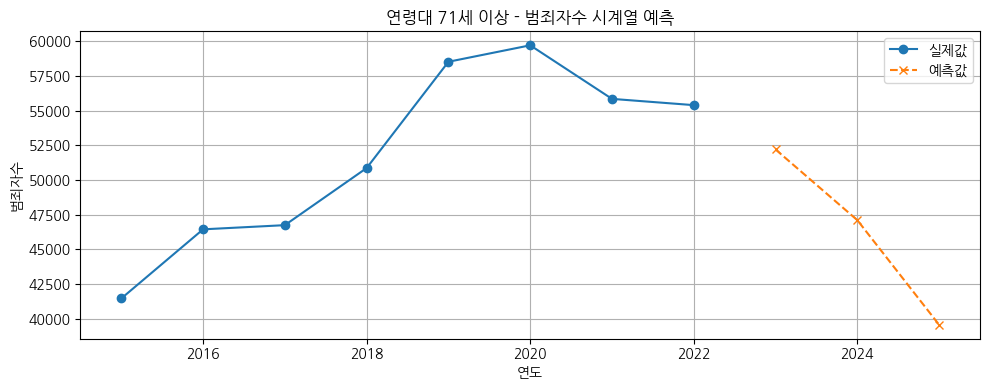

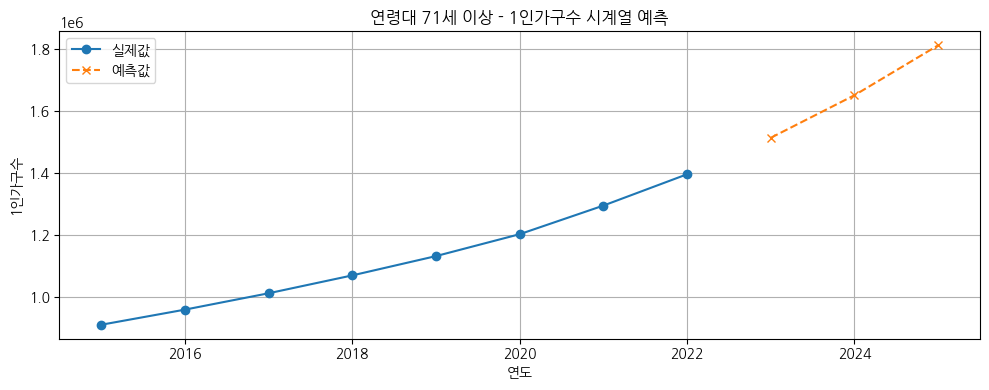


          분석 종료: 연령대 '71세 이상'




In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

unique_age_groups = df_merged['연령대'].unique()
print(f"분석할 연령대: {unique_age_groups}\n")


for age_group in unique_age_groups:
    print(f"==================================================")
    print(f"          분석 시작: 연령대 '{age_group}'")
    print(f"==================================================\n")

    df_filtered_age = df_merged[df_merged['연령대'] == age_group]
    grouped_age = df_filtered_age.groupby('연도')[['범죄자수', '1인가구수']].sum()
    grouped_age = grouped_age.dropna().sort_index()
    if len(grouped_age) < 2:
        print(f"경고: 연령대 '{age_group}'에 대한 연도별 데이터가 부족하여 시계열 분석을 수행할 수 없습니다 (관측치 수: {len(grouped_age)}).")
        print(f"\n==================================================")
        print(f"          분석 종료: 연령대 '{age_group}'")
        print(f"==================================================\n\n")
        continue

    # --- 시계열 안정성 검정 (ADF Test) ---
    def check_stationarity(series, name):
        result = adfuller(series)
        print(f"ADF Test: {name}")
        print(f"ADF Statistic: {result[0]:.4f}")
        print(f"p-value: {result[1]:.4f}")
        print("=> " + ("정상" if result[1] < 0.05 else "비정상"))

    print("--- 안정성 검정 ---")
    check_stationarity(grouped_age['범죄자수'], '범죄자수')
    check_stationarity(grouped_age['1인가구수'], '1인가구수')
    print("\n")

    # --- 1차 차분 ---
    grouped_diff_age = grouped_age.diff().dropna()

    if grouped_diff_age.empty:
        print(f"경고: 연령대 '{age_group}'에 대한 차분 데이터가 비어있어 VAR 모델을 적합할 수 없습니다.")
        print(f"\n==================================================")
        print(f"          분석 종료: 연령대 '{age_group}'")
        print(f"==================================================\n\n")
        continue

    if len(grouped_diff_age) < 2: # VAR 모델을 적합하려면 최소 2개 이상의 차분 데이터가 필요 (lag=1 고려)
        print(f"경고: 연령대 '{age_group}'에 대한 차분 데이터가 부족하여 VAR 모델을 적합할 수 없습니다 (차분 후 관측치 수: {len(grouped_diff_age)}).")
        print(f"\n==================================================")
        print(f"          분석 종료: 연령대 '{age_group}'")
        print(f"==================================================\n\n")
        continue

    # --- VAR 모델 적합 ---
    print("--- VAR 모델 적합 결과 ---")
    try:
        model_age = VAR(grouped_diff_age)
        results_age = model_age.fit(maxlags=1, ic='aic', verbose=False) # maxlags=1로 고정하되, ic를 통해 최적 lag도 찾아볼 수 있음 (단, 데이터 적을 땐 불안정)
        print(results_age.summary())
        print("\n")

        # --- 예측 (향후 3년) ---
        print("--- 예측 결과 (1차 차분) ---")
        forecast_diff_age = results_age.forecast(grouped_diff_age.values, steps=3)
        forecast_df_diff_age = pd.DataFrame(forecast_diff_age, columns=grouped_age.columns)
        forecast_df_diff_age.index = pd.RangeIndex(start=grouped_age.index.max() + 1, stop=grouped_age.index.max() + 1 + 3, step=1)
        print(forecast_df_diff_age)
        print("\n")

        # --- 원본 스케일로 예측값 복원 ---
        print("--- 복원된 예측값 (실제 스케일) ---")
        last_actual_age = grouped_age.iloc[-1]
        forecast_cumsum_age = forecast_df_diff_age.cumsum()
        forecast_recovered_age = forecast_cumsum_age.add(last_actual_age, axis=1)
        print(forecast_recovered_age)
        print("\n")

        # --- 시각화 ---
        print("--- 시각화 ---")
        for col in grouped_age.columns:
            plt.figure(figsize=(10, 4))
            plt.plot(grouped_age[col], label='실제값', marker='o')
            plt.plot(forecast_recovered_age[col], label='예측값', linestyle='--', marker='x')
            plt.title(f'연령대 {age_group} - {col} 시계열 예측')
            plt.xlabel('연도')
            plt.ylabel(col)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"오류: 연령대 '{age_group}'에 대한 VAR 모델 적합 또는 예측 중 오류 발생 - {e}")
        print("데이터 부족 또는 모형 적합 문제일 수 있습니다.")

    print(f"\n==================================================")
    print(f"          분석 종료: 연령대 '{age_group}'")
    print(f"==================================================\n\n")

# 경고 메시지 다시 활성화
warnings.filterwarnings("default")

# 성별별 1인 가구 & 범죄자 수

분석할 성별: ['남자' '여자']

          분석 시작: 성별 '남자'

--- 안정성 검정 ---
ADF Test: 범죄자수
ADF Statistic: 0.6272
p-value: 0.9883
=> 비정상
ADF Test: 1인가구수
ADF Statistic: 4.9612
p-value: 1.0000
=> 비정상


--- VAR 모델 적합 결과 ---
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Jun, 2025
Time:                     14:36:00
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    45.1399
Nobs:                     7.00000    HQIC:                   44.9643
Log likelihood:          -175.909    FPE:                4.09669e+19
AIC:                      45.1554    Det(Omega_mle):     3.13653e+19
--------------------------------------------------------------------
Results for equation 범죄자수
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const    -65755.285714     34212.

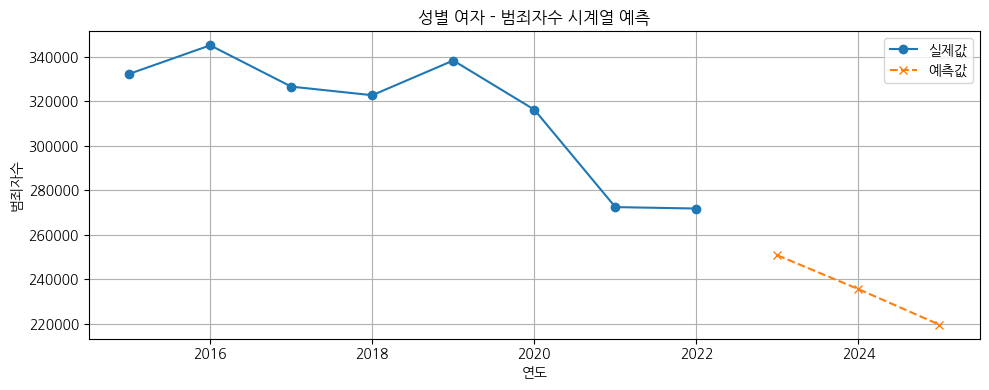

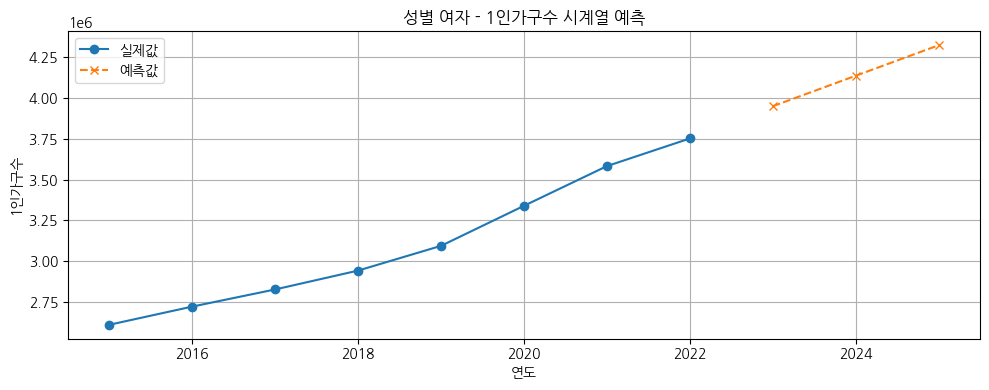


          분석 종료: 성별 '여자'




In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

unique_genders = df_merged['성별'].unique()
print(f"분석할 성별: {unique_genders}\n")

for gender in unique_genders:
    print(f"==================================================")
    print(f"          분석 시작: 성별 '{gender}'")
    print(f"==================================================\n")

    df_filtered_gender = df_merged[df_merged['성별'] == gender]
    grouped_gender = df_filtered_gender.groupby('연도')[['범죄자수', '1인가구수']].sum()

    grouped_gender = grouped_gender.dropna().sort_index()

    if len(grouped_gender) < 2:
        print(f"경고: 성별 '{gender}'에 대한 연도별 데이터가 부족하여 시계열 분석을 수행할 수 없습니다 (관측치 수: {len(grouped_gender)}).")
        print(f"\n==================================================")
        print(f"          분석 종료: 성별 '{gender}'")
        print(f"==================================================\n\n")
        continue

    # --- 시계열 안정성 검정 (ADF Test) ---
    def check_stationarity(series, name):
        result = adfuller(series)
        print(f"ADF Test: {name}")
        print(f"ADF Statistic: {result[0]:.4f}")
        print(f"p-value: {result[1]:.4f}")
        print("=> " + ("정상" if result[1] < 0.05 else "비정상"))

    print("--- 안정성 검정 ---")
    check_stationarity(grouped_gender['범죄자수'], '범죄자수')
    check_stationarity(grouped_gender['1인가구수'], '1인가구수')
    print("\n")

    # --- 1차 차분 ---
    grouped_diff_gender = grouped_gender.diff().dropna()

    if grouped_diff_gender.empty:
        print(f"경고: 성별 '{gender}'에 대한 차분 데이터가 비어있어 VAR 모델을 적합할 수 없습니다.")
        print(f"\n==================================================")
        print(f"          분석 종료: 성별 '{gender}'")
        print(f"==================================================\n\n")
        continue

    if len(grouped_diff_gender) < 2:
        print(f"경고: 성별 '{gender}'에 대한 차분 데이터가 부족하여 VAR 모델을 적합할 수 없습니다 (차분 후 관측치 수: {len(grouped_diff_gender)}).")
        print(f"\n==================================================")
        print(f"          분석 종료: 성별 '{gender}'")
        print(f"==================================================\n\n")
        continue

    # --- VAR 모델 적합 ---
    print("--- VAR 모델 적합 결과 ---")
    try:
        model_gender = VAR(grouped_diff_gender)
        results_gender = model_gender.fit(maxlags=1, ic='aic', verbose=False)
        print(results_gender.summary())
        print("\n")

        # --- 예측 (향후 3년) ---
        print("--- 예측 결과 (1차 차분) ---")
        forecast_diff_gender = results_gender.forecast(grouped_diff_gender.values, steps=3)
        forecast_df_diff_gender = pd.DataFrame(forecast_diff_gender, columns=grouped_gender.columns)
        forecast_df_diff_gender.index = pd.RangeIndex(start=grouped_gender.index.max() + 1, stop=grouped_gender.index.max() + 1 + 3, step=1)
        print(forecast_df_diff_gender)
        print("\n")

        # --- 원본 스케일로 예측값 복원 ---
        print("--- 복원된 예측값 (실제 스케일) ---")
        last_actual_gender = grouped_gender.iloc[-1]
        forecast_cumsum_gender = forecast_df_diff_gender.cumsum()
        forecast_recovered_gender = forecast_cumsum_gender.add(last_actual_gender, axis=1)
        print(forecast_recovered_gender)
        print("\n")

        # --- 시각화 ---
        print("--- 시각화 ---")
        for col in grouped_gender.columns:
            plt.figure(figsize=(10, 4))
            plt.plot(grouped_gender[col], label='실제값', marker='o')
            plt.plot(forecast_recovered_gender[col], label='예측값', linestyle='--', marker='x')
            plt.title(f'성별 {gender} - {col} 시계열 예측')
            plt.xlabel('연도')
            plt.ylabel(col)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"오류: 성별 '{gender}'에 대한 VAR 모델 적합 또는 예측 중 오류 발생 - {e}")
        print("데이터 부족 또는 모형 적합 문제일 수 있습니다.")

    print(f"\n==================================================")
    print(f"          분석 종료: 성별 '{gender}'")
    print(f"==================================================\n\n")

# 경고 메시지 다시 활성화
warnings.filterwarnings("default")

# 범죄자수 영향 요인 다중 회귀 분석

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

print("--- 1. 회귀 분석 (다중회귀분석) 시작 ---\n")

X = df_merged[['성별', '연령대', '1인가구수']]
y = df_merged['범죄자수']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[['성별', '연령대']])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['성별', '연령대']))

X_final = pd.concat([X_encoded_df, X['1인가구수']], axis=1)

X_final = sm.add_constant(X_final)

model_regression = sm.OLS(y, X_final)
results_regression = model_regression.fit()

print(results_regression.summary())

print("\n--- 회귀 분석 결과 해석 ---")
print("변수별 p-value와 계수를 통해 범죄자수에 미치는 영향력을 파악합니다.")
print("p-value가 0.05보다 작으면 통계적으로 유의미한 영향을 미친다고 해석할 수 있습니다.")
print("계수(coef)는 해당 변수가 한 단위 증가할 때 종속변수(범죄자수)가 얼마나 변하는지를 나타냅니다.\n")

print("--- 유의미한 영향 변수 (p-value < 0.05) ---")
significant_vars = results_regression.pvalues[results_regression.pvalues < 0.05]
significant_coefs = results_regression.params[significant_vars.index]

if not significant_vars.empty:
    for var, p_val in significant_vars.items():
        if var == 'const':
            continue
        coef = significant_coefs[var]
        print(f"- {var}: 계수 = {coef:.2f}, p-value = {p_val:.4f}")
        if '1인가구수' in var:
            print(f"  -> 1인가구수가 범죄자수에 미치는 영향입니다.")
        elif '성별' in var:
            print(f"  -> 이 성별 그룹이 기준 성별(보통 첫 번째 더미변수)에 비해 범죄자수에 미치는 영향입니다.")
        elif '연령대' in var:
            print(f"  -> 이 연령대 그룹이 기준 연령대(보통 첫 번째 더미변수)에 비해 범죄자수에 미치는 영향입니다.")
else:
    print("통계적으로 유의미한 영향을 미치는 변수가 없습니다. (p-value < 0.05 기준)")

print("\n--- 회귀 분석 (다중회귀분석) 종료 ---\n")

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


--- 1. 회귀 분석 (다중회귀분석) 시작 ---

                            OLS Regression Results                            
Dep. Variable:                   범죄자수   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     79.10
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           1.72e-40
Time:                        14:38:07   Log-Likelihood:                -1333.0
No. Observations:                 112   AIC:                             2684.
Df Residuals:                     103   BIC:                             2709.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.242e+04 

# 성별·연령대별 범죄자수 시계열 추세 분석


--- 2. 시계열 분해 및 시각화 시작 ---

시계열 분해를 수행할 성별-연령대 조합: ['남자_20세 이하' '남자_21~30세' '남자_31~40세' '남자_41~50세' '남자_51~60세' '남자_61~70세'
 '남자_71세 이상' '여자_20세 이하' '여자_21~30세' '여자_31~40세' '여자_41~50세' '여자_51~60세'
 '여자_61~70세' '여자_71세 이상']

--------------------------------------------------
          시계열 분해: '남자' - '20세 이하'
--------------------------------------------------



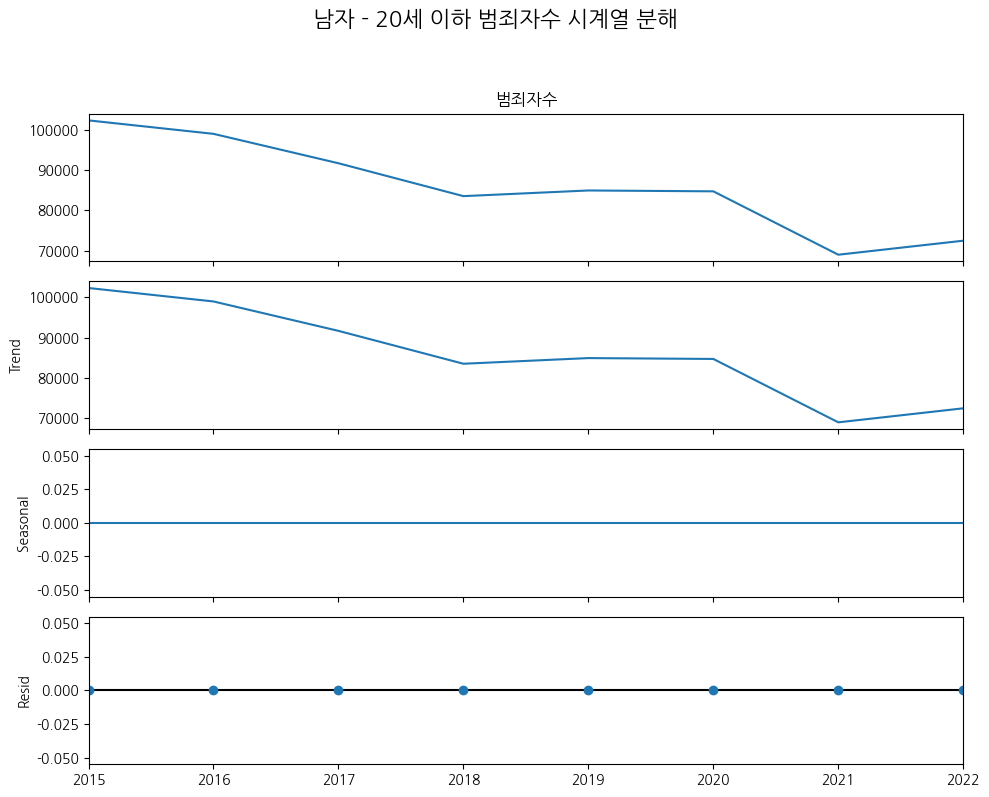

패턴, 추세, 이상점 등 시각적 분석:
- 원본 데이터: 연도
2015    102265
2016     98933
2017     91650
2018     83507
2019     84908
- 추세 (Trend): 연도
2015    102265.0
2016     98933.0
2017     91650.0
2018     83507.0
2019     84908.0
- 계절성 (Seasonal): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
- 잔차 (Residual): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0

**참고:** 데이터 길이가 짧아 (8개년) 계절성(Seasonal)은 유의미하게 분해되지 않을 수 있으며, 주로 추세(Trend) 변화에 집중하여 해석해야 합니다.
--------------------------------------------------


--------------------------------------------------
          시계열 분해: '남자' - '21~30세'
--------------------------------------------------



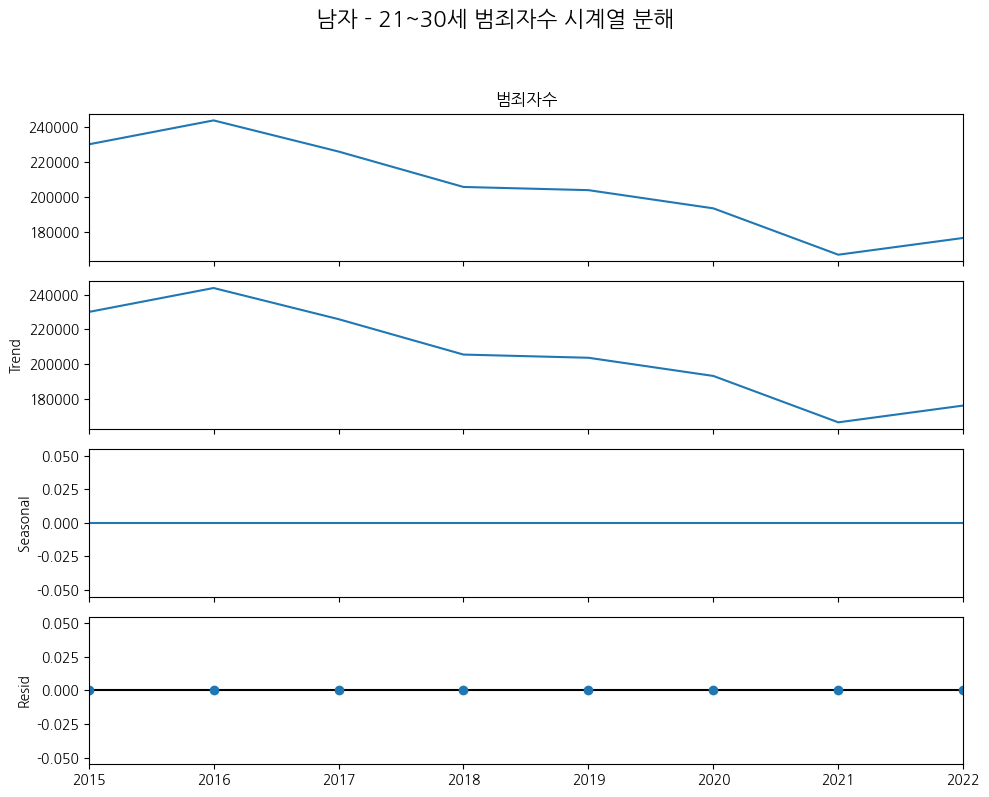

패턴, 추세, 이상점 등 시각적 분석:
- 원본 데이터: 연도
2015    230062
2016    243829
2017    225940
2018    205601
2019    203765
- 추세 (Trend): 연도
2015    230062.0
2016    243829.0
2017    225940.0
2018    205601.0
2019    203765.0
- 계절성 (Seasonal): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
- 잔차 (Residual): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0

**참고:** 데이터 길이가 짧아 (8개년) 계절성(Seasonal)은 유의미하게 분해되지 않을 수 있으며, 주로 추세(Trend) 변화에 집중하여 해석해야 합니다.
--------------------------------------------------


--------------------------------------------------
          시계열 분해: '남자' - '31~40세'
--------------------------------------------------



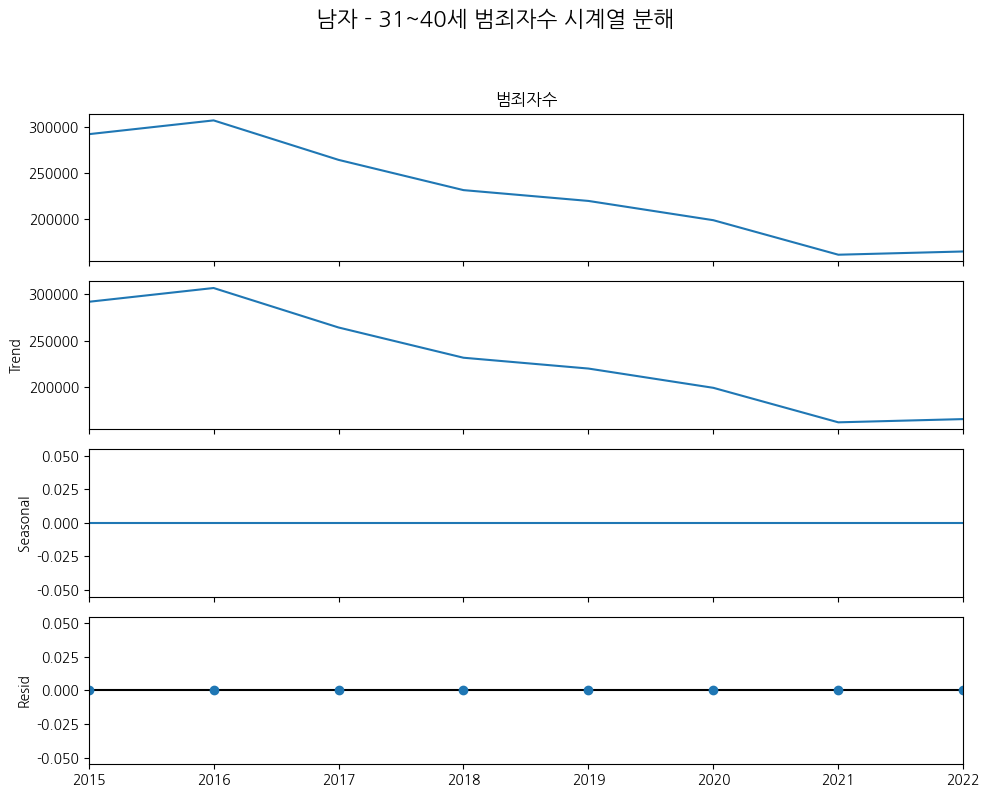

패턴, 추세, 이상점 등 시각적 분석:
- 원본 데이터: 연도
2015    292020
2016    306900
2017    264319
2018    231691
2019    220024
- 추세 (Trend): 연도
2015    292020.0
2016    306900.0
2017    264319.0
2018    231691.0
2019    220024.0
- 계절성 (Seasonal): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
- 잔차 (Residual): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0

**참고:** 데이터 길이가 짧아 (8개년) 계절성(Seasonal)은 유의미하게 분해되지 않을 수 있으며, 주로 추세(Trend) 변화에 집중하여 해석해야 합니다.
--------------------------------------------------


--------------------------------------------------
          시계열 분해: '남자' - '41~50세'
--------------------------------------------------



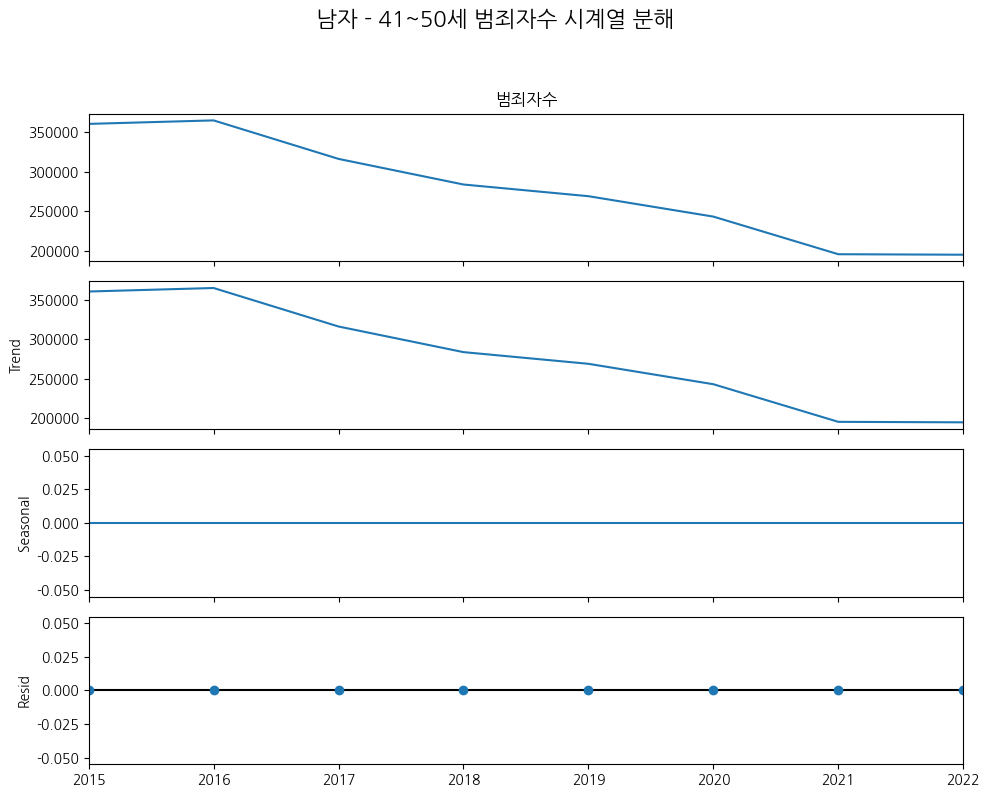

패턴, 추세, 이상점 등 시각적 분석:
- 원본 데이터: 연도
2015    360791
2016    365226
2017    316385
2018    283902
2019    269082
- 추세 (Trend): 연도
2015    360791.0
2016    365226.0
2017    316385.0
2018    283902.0
2019    269082.0
- 계절성 (Seasonal): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
- 잔차 (Residual): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0

**참고:** 데이터 길이가 짧아 (8개년) 계절성(Seasonal)은 유의미하게 분해되지 않을 수 있으며, 주로 추세(Trend) 변화에 집중하여 해석해야 합니다.
--------------------------------------------------


--------------------------------------------------
          시계열 분해: '남자' - '51~60세'
--------------------------------------------------



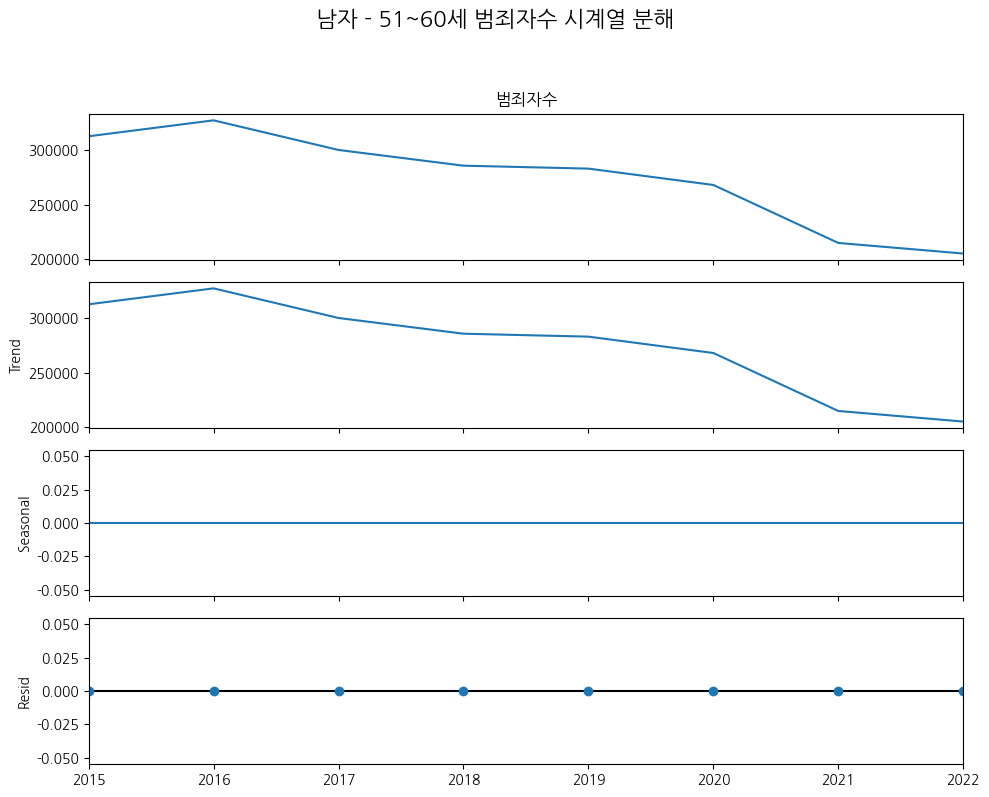

패턴, 추세, 이상점 등 시각적 분석:
- 원본 데이터: 연도
2015    313031
2016    327758
2017    300388
2018    285879
2019    283160
- 추세 (Trend): 연도
2015    313031.0
2016    327758.0
2017    300388.0
2018    285879.0
2019    283160.0
- 계절성 (Seasonal): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
- 잔차 (Residual): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0

**참고:** 데이터 길이가 짧아 (8개년) 계절성(Seasonal)은 유의미하게 분해되지 않을 수 있으며, 주로 추세(Trend) 변화에 집중하여 해석해야 합니다.
--------------------------------------------------


--------------------------------------------------
          시계열 분해: '남자' - '61~70세'
--------------------------------------------------



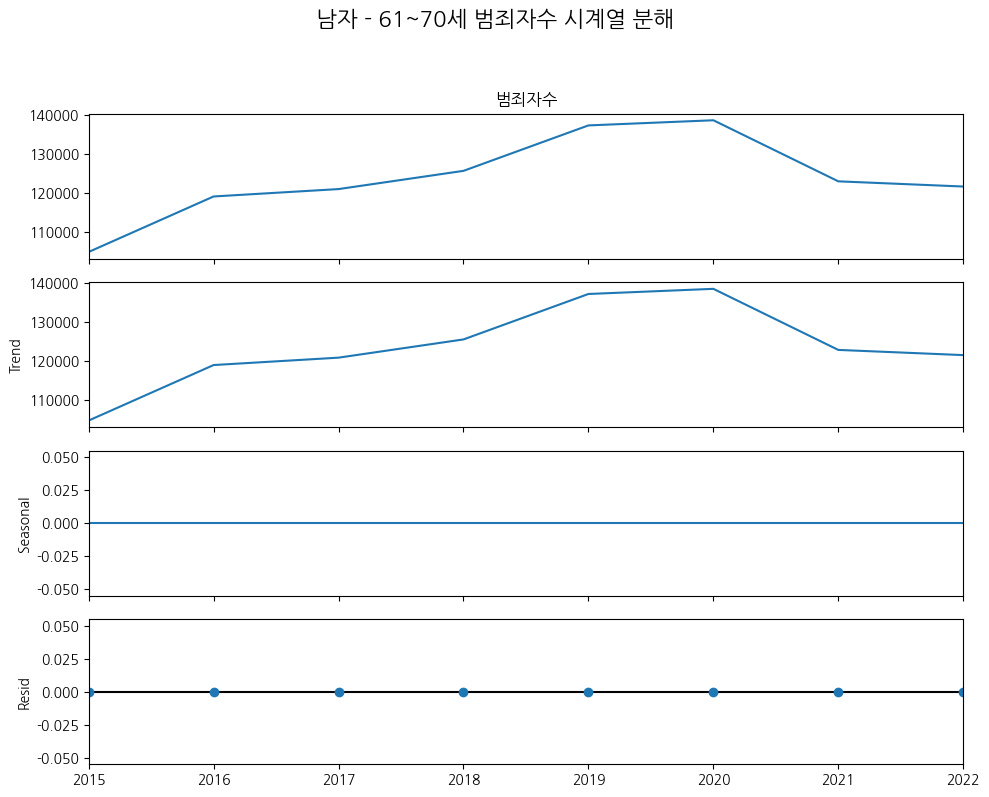

패턴, 추세, 이상점 등 시각적 분석:
- 원본 데이터: 연도
2015    104834
2016    119071
2017    120967
2018    125642
2019    137301
- 추세 (Trend): 연도
2015    104834.0
2016    119071.0
2017    120967.0
2018    125642.0
2019    137301.0
- 계절성 (Seasonal): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
- 잔차 (Residual): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0

**참고:** 데이터 길이가 짧아 (8개년) 계절성(Seasonal)은 유의미하게 분해되지 않을 수 있으며, 주로 추세(Trend) 변화에 집중하여 해석해야 합니다.
--------------------------------------------------


--------------------------------------------------
          시계열 분해: '남자' - '71세 이상'
--------------------------------------------------



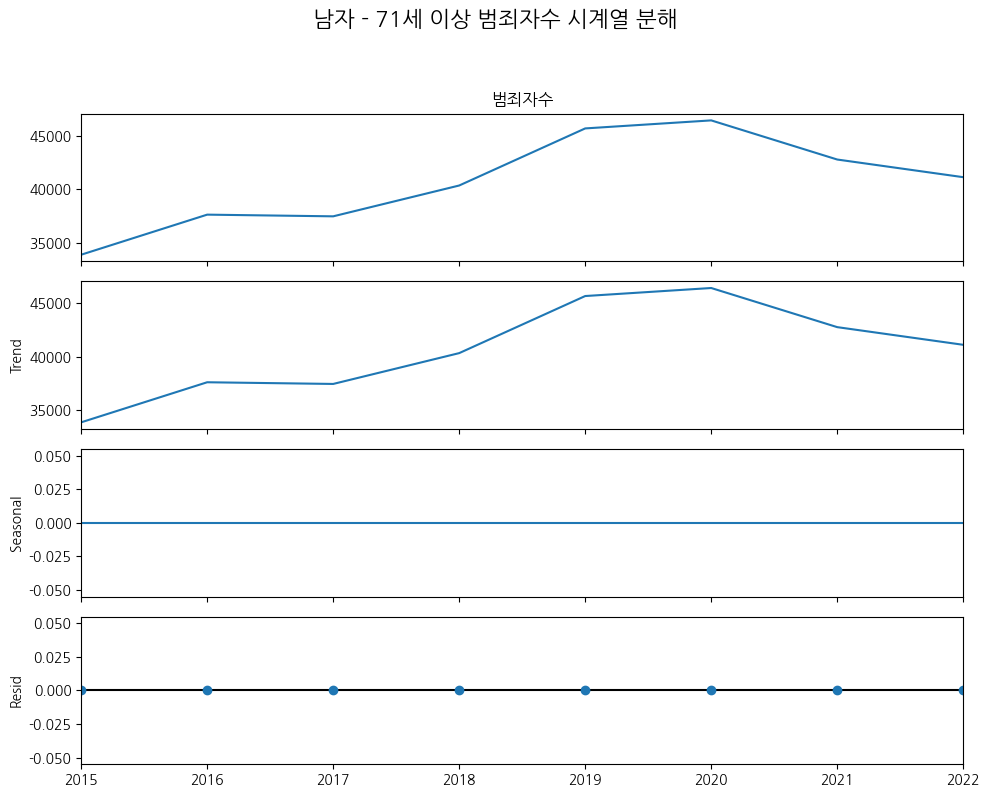

패턴, 추세, 이상점 등 시각적 분석:
- 원본 데이터: 연도
2015    33871
2016    37621
2017    37463
2018    40348
2019    45690
- 추세 (Trend): 연도
2015    33871.0
2016    37621.0
2017    37463.0
2018    40348.0
2019    45690.0
- 계절성 (Seasonal): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
- 잔차 (Residual): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0

**참고:** 데이터 길이가 짧아 (8개년) 계절성(Seasonal)은 유의미하게 분해되지 않을 수 있으며, 주로 추세(Trend) 변화에 집중하여 해석해야 합니다.
--------------------------------------------------


--------------------------------------------------
          시계열 분해: '여자' - '20세 이하'
--------------------------------------------------



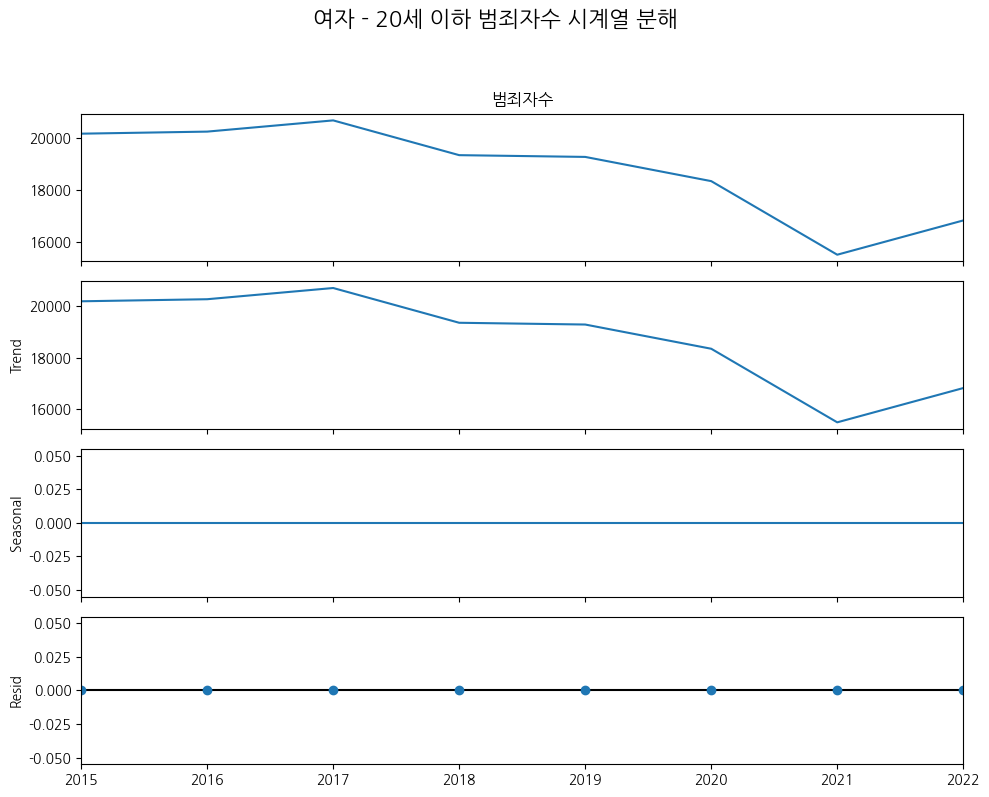

패턴, 추세, 이상점 등 시각적 분석:
- 원본 데이터: 연도
2015    20183
2016    20263
2017    20697
2018    19352
2019    19284
- 추세 (Trend): 연도
2015    20183.0
2016    20263.0
2017    20697.0
2018    19352.0
2019    19284.0
- 계절성 (Seasonal): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
- 잔차 (Residual): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0

**참고:** 데이터 길이가 짧아 (8개년) 계절성(Seasonal)은 유의미하게 분해되지 않을 수 있으며, 주로 추세(Trend) 변화에 집중하여 해석해야 합니다.
--------------------------------------------------


--------------------------------------------------
          시계열 분해: '여자' - '21~30세'
--------------------------------------------------



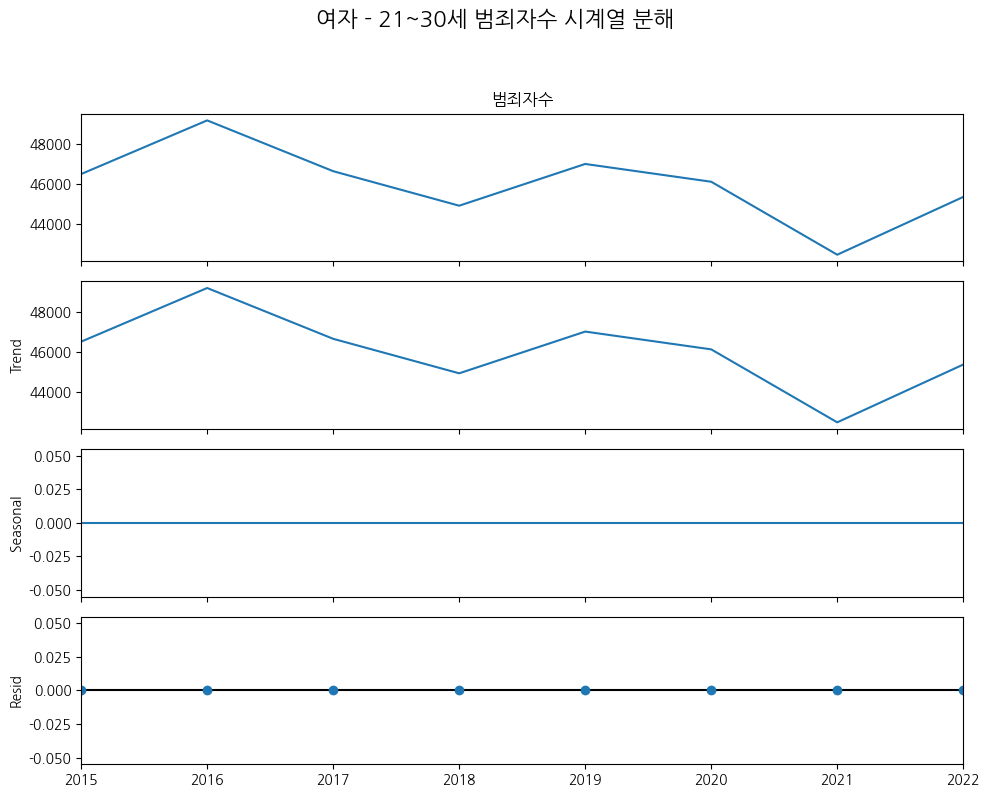

패턴, 추세, 이상점 등 시각적 분석:
- 원본 데이터: 연도
2015    46501
2016    49189
2017    46644
2018    44915
2019    47006
- 추세 (Trend): 연도
2015    46501.0
2016    49189.0
2017    46644.0
2018    44915.0
2019    47006.0
- 계절성 (Seasonal): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
- 잔차 (Residual): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0

**참고:** 데이터 길이가 짧아 (8개년) 계절성(Seasonal)은 유의미하게 분해되지 않을 수 있으며, 주로 추세(Trend) 변화에 집중하여 해석해야 합니다.
--------------------------------------------------


--------------------------------------------------
          시계열 분해: '여자' - '31~40세'
--------------------------------------------------



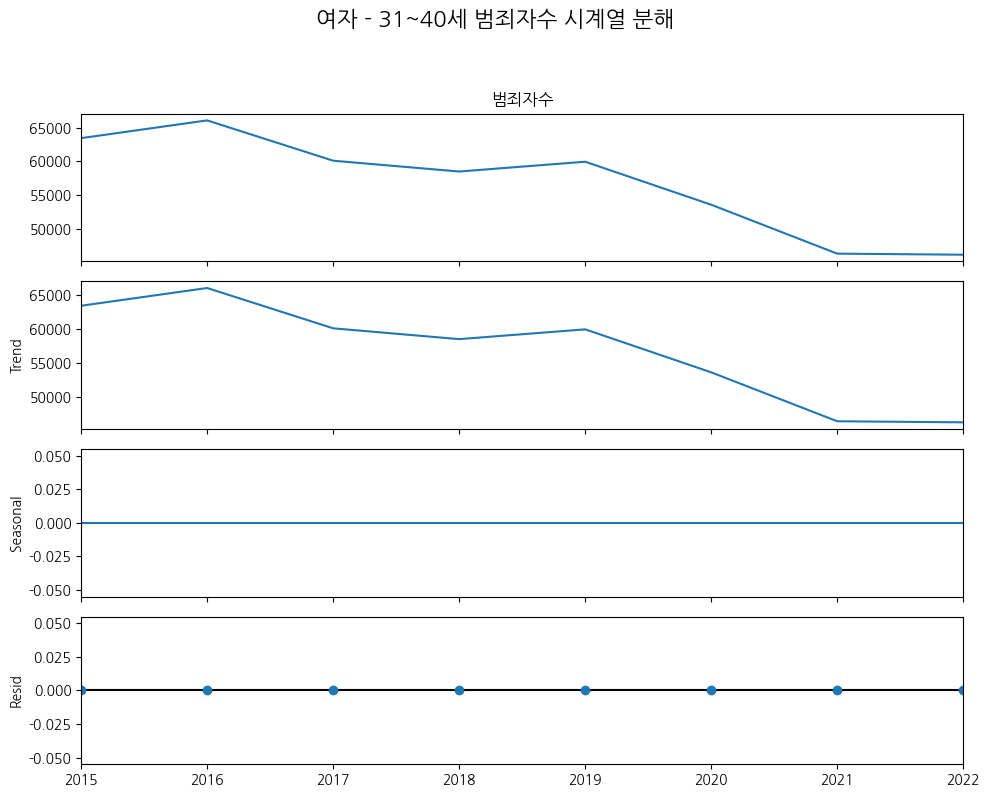

패턴, 추세, 이상점 등 시각적 분석:
- 원본 데이터: 연도
2015    63439
2016    66057
2017    60108
2018    58513
2019    59958
- 추세 (Trend): 연도
2015    63439.0
2016    66057.0
2017    60108.0
2018    58513.0
2019    59958.0
- 계절성 (Seasonal): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
- 잔차 (Residual): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0

**참고:** 데이터 길이가 짧아 (8개년) 계절성(Seasonal)은 유의미하게 분해되지 않을 수 있으며, 주로 추세(Trend) 변화에 집중하여 해석해야 합니다.
--------------------------------------------------


--------------------------------------------------
          시계열 분해: '여자' - '41~50세'
--------------------------------------------------



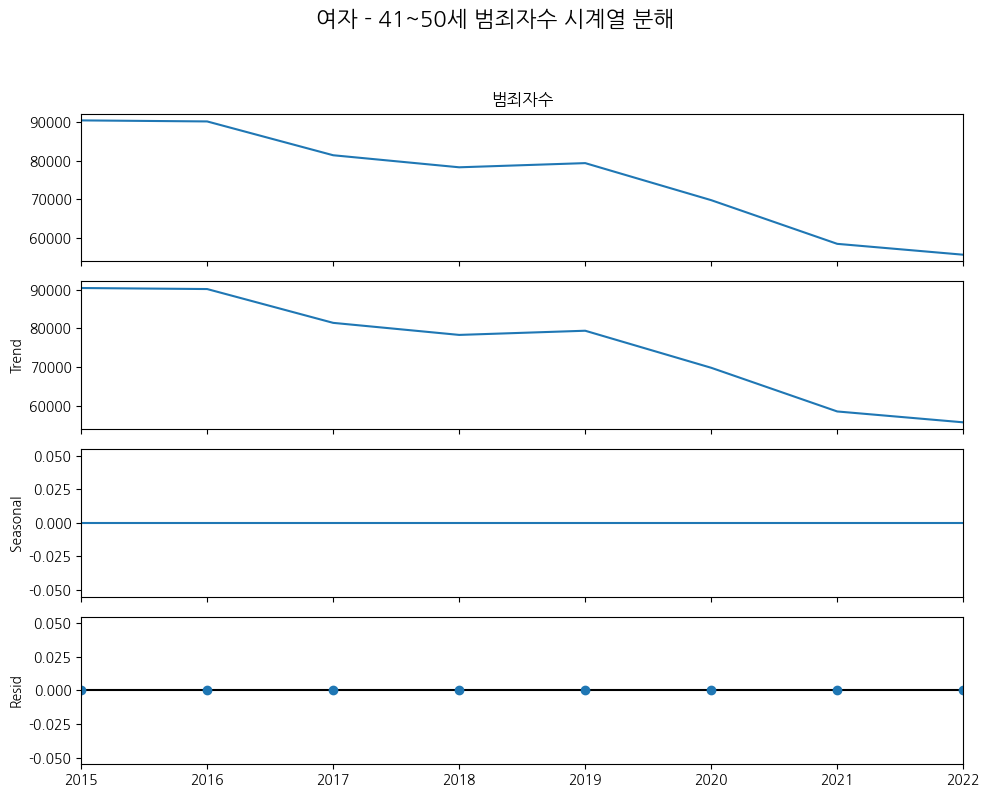

패턴, 추세, 이상점 등 시각적 분석:
- 원본 데이터: 연도
2015    90448
2016    90178
2017    81420
2018    78299
2019    79381
- 추세 (Trend): 연도
2015    90448.0
2016    90178.0
2017    81420.0
2018    78299.0
2019    79381.0
- 계절성 (Seasonal): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
- 잔차 (Residual): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0

**참고:** 데이터 길이가 짧아 (8개년) 계절성(Seasonal)은 유의미하게 분해되지 않을 수 있으며, 주로 추세(Trend) 변화에 집중하여 해석해야 합니다.
--------------------------------------------------


--------------------------------------------------
          시계열 분해: '여자' - '51~60세'
--------------------------------------------------



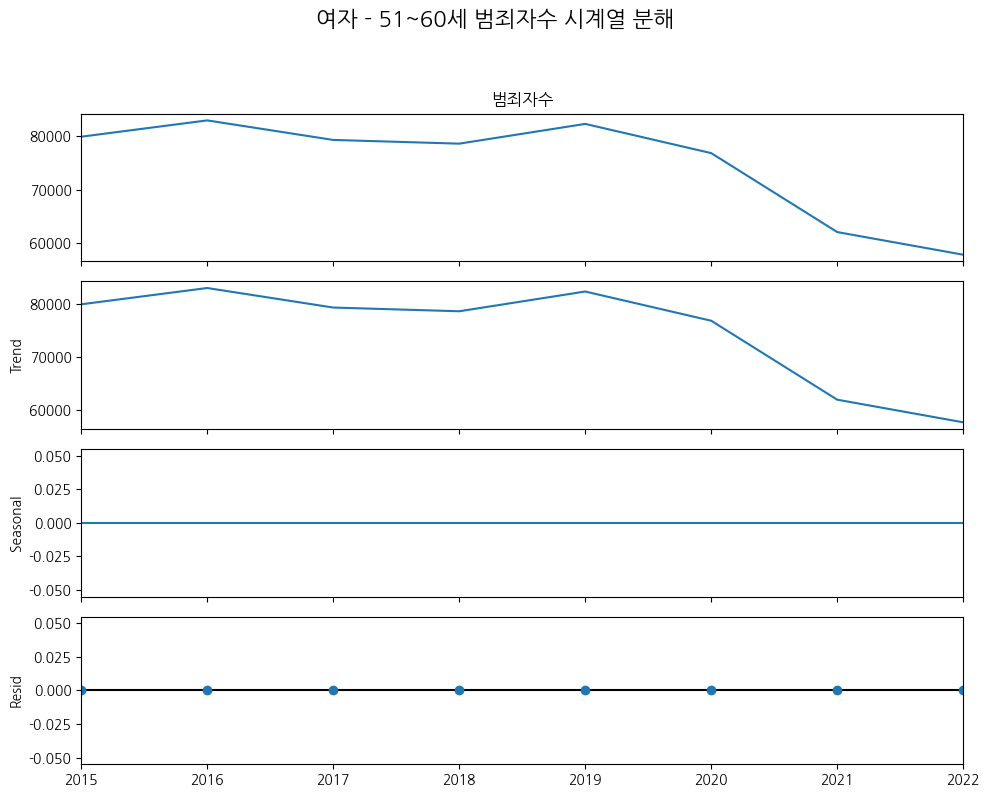

패턴, 추세, 이상점 등 시각적 분석:
- 원본 데이터: 연도
2015    79958
2016    83034
2017    79351
2018    78649
2019    82373
- 추세 (Trend): 연도
2015    79958.0
2016    83034.0
2017    79351.0
2018    78649.0
2019    82373.0
- 계절성 (Seasonal): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
- 잔차 (Residual): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0

**참고:** 데이터 길이가 짧아 (8개년) 계절성(Seasonal)은 유의미하게 분해되지 않을 수 있으며, 주로 추세(Trend) 변화에 집중하여 해석해야 합니다.
--------------------------------------------------


--------------------------------------------------
          시계열 분해: '여자' - '61~70세'
--------------------------------------------------



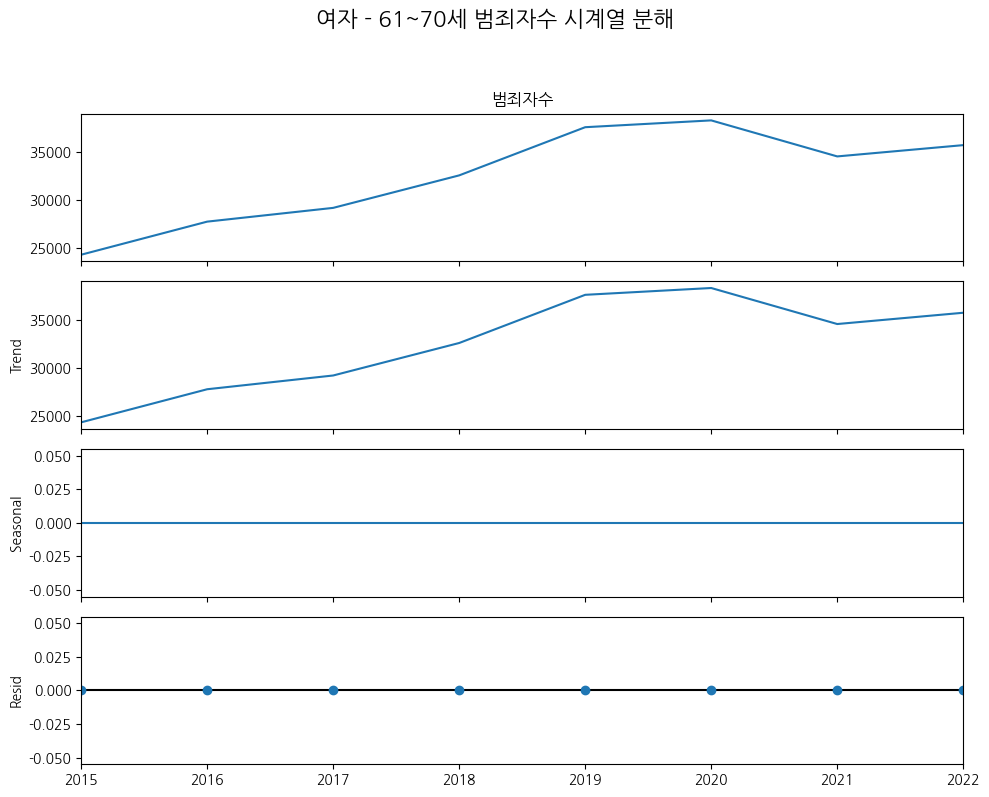

패턴, 추세, 이상점 등 시각적 분석:
- 원본 데이터: 연도
2015    24304
2016    27759
2017    29196
2018    32590
2019    37621
- 추세 (Trend): 연도
2015    24304.0
2016    27759.0
2017    29196.0
2018    32590.0
2019    37621.0
- 계절성 (Seasonal): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
- 잔차 (Residual): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0

**참고:** 데이터 길이가 짧아 (8개년) 계절성(Seasonal)은 유의미하게 분해되지 않을 수 있으며, 주로 추세(Trend) 변화에 집중하여 해석해야 합니다.
--------------------------------------------------


--------------------------------------------------
          시계열 분해: '여자' - '71세 이상'
--------------------------------------------------



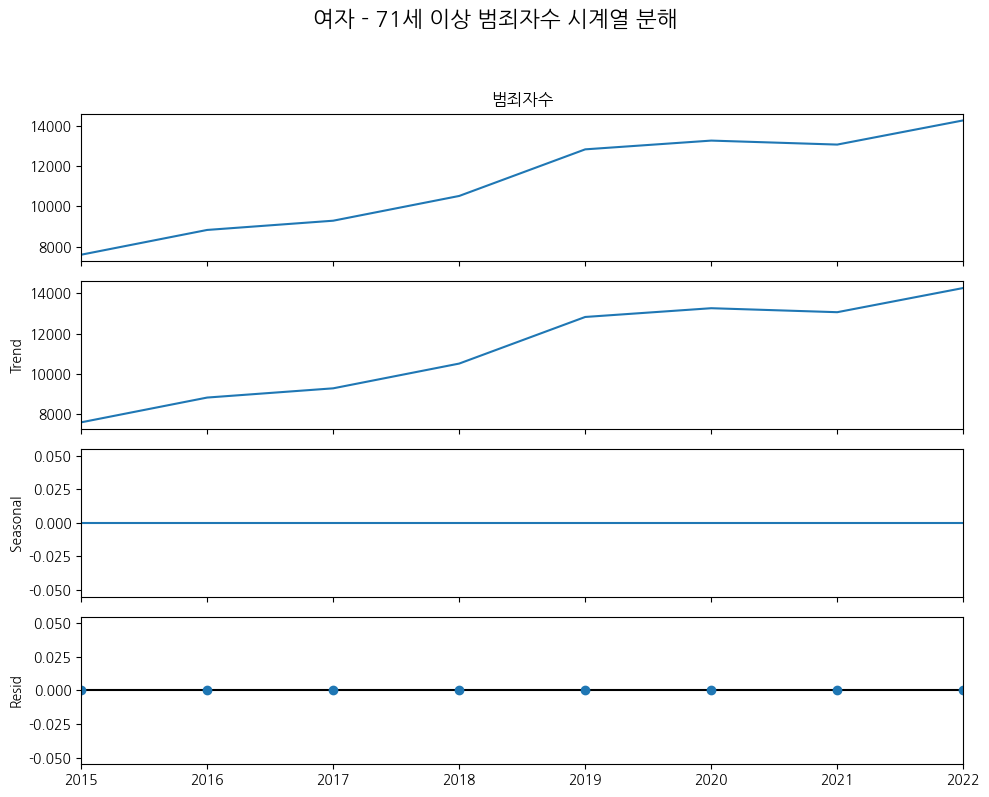

패턴, 추세, 이상점 등 시각적 분석:
- 원본 데이터: 연도
2015     7595
2016     8826
2017     9285
2018    10515
2019    12831
- 추세 (Trend): 연도
2015     7595.0
2016     8826.0
2017     9285.0
2018    10515.0
2019    12831.0
- 계절성 (Seasonal): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
- 잔차 (Residual): 연도
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0

**참고:** 데이터 길이가 짧아 (8개년) 계절성(Seasonal)은 유의미하게 분해되지 않을 수 있으며, 주로 추세(Trend) 변화에 집중하여 해석해야 합니다.
--------------------------------------------------



--- 2. 시계열 분해 및 시각화 종료 ---



In [ ]:
# --- 2. 시계열 분해 및 시각화 시작 ---
print("\n--- 2. 시계열 분해 및 시각화 시작 ---\n")

df_merged['성별_연령대'] = df_merged['성별'] + '_' + df_merged['연령대']
unique_combinations = df_merged['성별_연령대'].unique()

print(f"시계열 분해를 수행할 성별-연령대 조합: {unique_combinations}\n")

for combo in unique_combinations:
    gender, age_group = combo.split('_', 1)

    print(f"--------------------------------------------------")
    print(f"          시계열 분해: '{gender}' - '{age_group}'")
    print(f"--------------------------------------------------\n")
    df_combo = df_merged[(df_merged['성별'] == gender) & (df_merged['연령대'] == age_group)]
    df_combo = df_combo.set_index('연도')['범죄자수'].sort_index()

    if len(df_combo) < 2:
        print(f"경고: 조합 '{combo}'에 대한 데이터가 부족하여 시계열 분해를 수행할 수 없습니다 (관측치 수: {len(df_combo)}).")
        print(f"--------------------------------------------------\n\n")
        continue
    try:
        decomposition = seasonal_decompose(df_combo, model='additive', period=1, extrapolate_trend='freq')

        fig = decomposition.plot()
        fig.set_size_inches(10, 8)
        fig.suptitle(f'{gender} - {age_group} 범죄자수 시계열 분해', y=1.02, fontsize=16) # y는 제목 위치 조정
        plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # 전체 레이아웃 조정
        plt.show()

        print("패턴, 추세, 이상점 등 시각적 분석:")
        print(f"- 원본 데이터: {df_combo.head().to_string()}")
        print(f"- 추세 (Trend): {decomposition.trend.head().to_string()}")
        print(f"- 계절성 (Seasonal): {decomposition.seasonal.head().to_string()}") # 매우 미미하거나 상수값일 가능성
        print(f"- 잔차 (Residual): {decomposition.resid.head().to_string()}")
        print("\n**참고:** 데이터 길이가 짧아 (8개년) 계절성(Seasonal)은 유의미하게 분해되지 않을 수 있으며, 주로 추세(Trend) 변화에 집중하여 해석해야 합니다.")

    except ValueError as e:
        print(f"오류: 조합 '{combo}'의 시계열 분해 중 오류 발생 - {e}")
        print("데이터 길이가 너무 짧거나, 특정 패턴을 감지하기 어렵습니다.")
        print("--------------------------------------------------\n\n")
        continue
    except Exception as e:
        print(f"알 수 없는 오류 발생: {e}")

    print(f"--------------------------------------------------\n\n")

print("\n--- 2. 시계열 분해 및 시각화 종료 ---\n")

# 성별·연령대별 범죄 패턴 군집화 분석


--- 3. Clustering (군집화) 시작 ---

군집화에 사용될 데이터 (성별-연령대별 범죄자수 시계열):
 연도           2015    2016    2017    2018    2019    2020    2021    2022
성별 연령대                                                                   
남자 20세 이하  102265   98933   91650   83507   84908   84696   68997   72468
   21~30세  230062  243829  225940  205601  203765  193314  166680  176314
   31~40세  292020  306900  264319  231691  220024  199230  162011  165501
   41~50세  360791  365226  316385  283902  269082  243182  195464  194843
   51~60세  313031  327758  300388  285879  283160  268053  214493  204714

데이터 차원: (14, 8)

--- PCA (주성분 분석) 수행 ---
각 주성분별 설명된 분산 비율: [9.89200421e-01 9.74179474e-03 9.37487807e-04 6.40988880e-05
 3.02023830e-05 2.03863039e-05 3.90798200e-06 1.70075623e-06]
누적 설명된 분산 비율: [0.98920042 0.99894222 0.9998797  0.9999438  0.999974   0.99999439
 0.9999983  1.        ]

군집화에 사용될 주성분 데이터 차원: (14, 2)

--- KMeans 군집화 수행 ---
KMeans 군집화: 3개의 군집으로 분류

군집 결과:
           Cluster  성별     연령대
성별 연령대     

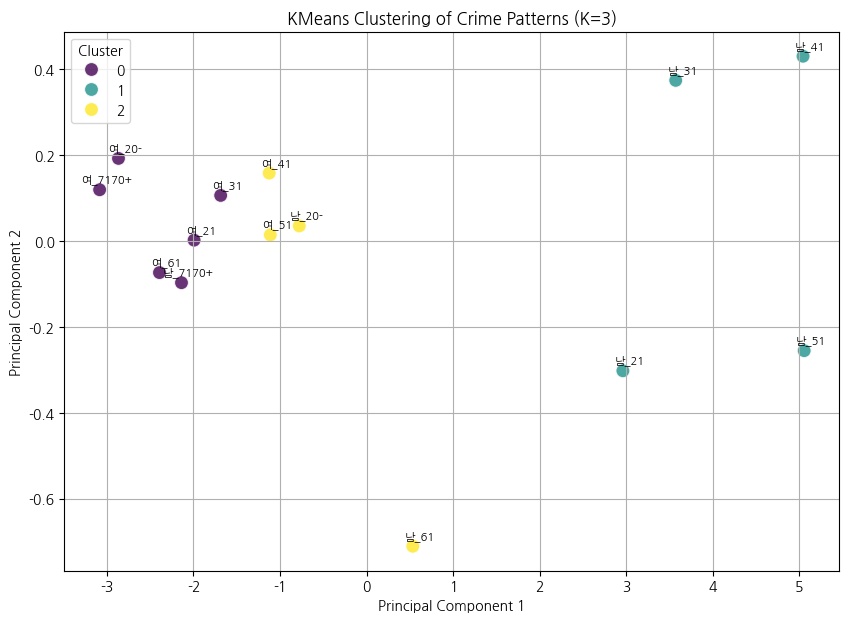


--- Clustering (군집화) 종료 ---



In [ ]:
# --- 3. Clustering (군집화) 시작 ---
print("\n--- 3. Clustering (군집화) 시작 ---\n")

crime_patterns = df_merged.groupby(['성별', '연령대', '연도'])['범죄자수'].sum().unstack(level='연도')

crime_patterns = crime_patterns.fillna(0)

print("군집화에 사용될 데이터 (성별-연령대별 범죄자수 시계열):\n", crime_patterns.head())
print(f"\n데이터 차원: {crime_patterns.shape}")
scaler = StandardScaler()
crime_patterns_scaled = scaler.fit_transform(crime_patterns)
crime_patterns_scaled_df = pd.DataFrame(crime_patterns_scaled, columns=crime_patterns.columns, index=crime_patterns.index)

print("\n--- PCA (주성분 분석) 수행 ---")
pca = PCA(n_components=min(crime_patterns_scaled.shape[1], crime_patterns_scaled.shape[0]-1)) # 주성분 수는 min(피처 수, 샘플 수-1)
principal_components = pca.fit_transform(crime_patterns_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print(f"각 주성분별 설명된 분산 비율: {explained_variance_ratio}")
print(f"누적 설명된 분산 비율: {np.cumsum(explained_variance_ratio)}")

n_components_for_clustering = 2
if principal_components.shape[1] < n_components_for_clustering:
    print(f"\n경고: 주성분 수가 {n_components_for_clustering}개보다 적어 시각화 차원 조절이 필요합니다.")
    n_components_for_clustering = principal_components.shape[1]

pca_final = PCA(n_components=n_components_for_clustering)
principal_components_final = pca_final.fit_transform(crime_patterns_scaled)
pca_df = pd.DataFrame(data=principal_components_final, columns=[f'PC{i+1}' for i in range(n_components_for_clustering)], index=crime_patterns.index)

print(f"\n군집화에 사용될 주성분 데이터 차원: {pca_df.shape}")

print("\n--- KMeans 군집화 수행 ---")

n_clusters = 3
print(f"KMeans 군집화: {n_clusters}개의 군집으로 분류")

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init=10은 권장되는 값
clusters = kmeans.fit_predict(pca_df)

pca_df['Cluster'] = clusters
pca_df['성별'] = [idx[0] for idx in pca_df.index]
pca_df['연령대'] = [idx[1] for idx in pca_df.index]

print("\n군집 결과:")
print(pca_df[['Cluster', '성별', '연령대']])


if n_components_for_clustering >= 2:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.8)
    for i, txt in enumerate(pca_df.index):
        plt.annotate(txt[0][0] + '_' + txt[1].split('~')[0].replace('세 이상', '70+').replace('20세 이하', '20-'),
                     (pca_df['PC1'][i], pca_df['PC2'][i]),
                     textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
    plt.title(f'KMeans Clustering of Crime Patterns (K={n_clusters})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()
else:
    print("\n경고: 2개 미만의 주성분으로 시각화할 수 없습니다. PCA 주성분 수를 확인하세요.")

print("\n--- Clustering (군집화) 종료 ---\n")